<span style="font-size: 24px;">社群媒體分析-期末專案（第28組）</span><br>
<span style="font-size: 20px;">主題：後疫情時代-醫療資訊討論版分析</span><br>
<span style="font-size: 14px;">組員名單：M124210004陳麗安、M134020033吳承穎</span>

報告影片:https://youtu.be/4Jr0gBSskK0




#一、動機與分析目的

在全民健保制度完善的台灣，醫療議題與每個人息息相關，Covid-19曾在全球造成重大衝擊，而我們也歷經了近三年的跌宕起伏。隨著疫情逐步趨緩，進入後疫情時代，社會大眾對於健康與醫療的關注並未隨之消退，而近期，台灣再度出現新一波疫情升溫的跡象。
本次專案聚焦於疫情趨緩至可能再起的這段時間，在PTT中「醫療資訊版」的熱門討論內容。透過此次專案分析，我們希望了解大眾對醫療議題的關注焦點、變化趨勢，以及可能反映出的健康需求與社會情緒。
</span>

# 二、資料集介紹</span><br>
<span style="font-size: 14px;">來源：Tarflow, PTT醫療資訊版</span><br>
<span style="font-size: 14px;">時間：2022/06/01~2025/06/01</span><br>
<span style="font-size: 14px;">關鍵字：無</span><br>
<span style="font-size: 14px;">資料筆數：2597筆</span>

#三、資料分析過程和視覺化結果</span><br>

In [1]:
!pip install pandas==2.2.2
!pip install matplotlib==3.8.2
!pip install wordcloud==1.9.3
!pip install jieba==0.42.1

  Using cached wordcloud-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (548 kB)
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.9.4
    Uninstalling wordcloud-1.9.4:
      Successfully uninstalled wordcloud-1.9.4


In [3]:
import os

from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/SMA_final/smaproject') #切換該目錄
os.listdir() #確認目錄內容

Mounted at /content/drive


['SourceHanSansTW-Regular.otf',
 'dict.txt',
 'stopwords.txt',
 'dict.txt.big',
 'SMA_Final_Rawdata.csv',
 'LIWC_CH.csv',
 'negative.txt',
 'positive.txt',
 'stop_words.txt',
 'TaipeiSansTCBeta-Regular.ttf',
 '.DS_Store',
 'health_lexicon.txt',
 'SMA期末專案.ipynb']

##(一）前處理＋文字雲繪製</span><br>

In [3]:
import pandas as pd
import jieba
import jieba.analyse
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

font_path = 'SourceHanSansTW-Regular.otf'
my_font = fm.FontProperties(fname=font_path)
font_name = my_font.get_name()

# 全域設定字體
# 把字型註冊進 matplotlib 系統
fm.fontManager.addfont(font_path)

# 設定成 matplotlib 預設字體（用檔案名，不用 .get_name()）
plt.rcParams['font.family'] = 'Source Han Sans TW'
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 150

# 設定文字雲中文字體路徑
FontPath = 'SourceHanSansTW-Regular.otf' # 設定字型

In [6]:
# 載入資料集
df = pd.read_csv('SMA_Final_Rawdata.csv')

clear_df = df.copy()

#去除本次不會用到的欄位
drop_cols = ['system_id', 'artUrl', 'artPoster', 'artCatagory', 'artComment', 'e_ip', 'insertedDate', 'dataSource']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','，', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode('sentence').reset_index(drop=True)
sent_df.head(10)

artTitle              artDate  \
0  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
1  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
2  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
3  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
4  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
5  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
6  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
7  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
8  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
9  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   

                                          artContent               sentence  
0  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...                     如題  
1  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...                 最近剛換工作  
2  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...            前一份工作是待在冷氣房  
3  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...                幾乎沒什麼勞力  
4  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...  所以已經長時間沒流汗（下班也懶得運動..）  
5  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...               最近剛換烘焙工作  
6  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...                   環境不熱  
7  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...                 但會稍微出汗  
8  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...               只是很久沒流汗了  
9  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...      回家後洗完澡發現胸前一大片的小紅點

In [7]:
# 初始化斷詞引擎：不一定要設定，只使用內建效果也可以
# 參考網址：https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt
jieba.set_dictionary('dict.txt')

#去除句子中除了字母、數字、空白字符以外的符號
sent_df['sentence'] = sent_df['sentence'].str.replace(r'[^\w\s]+', '', regex=True).astype(str)

# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

word_df = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

# 去除空值
word_df = word_df.dropna(subset=['word'])

word_df.head(10)

Building prefix dict from /content/drive/MyDrive/SMA_final/smaproject/dict.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/SMA_final/smaproject/dict.txt ...
Dumping model to file cache /tmp/jieba.u6124cfb9cf9551c68d326a6b8a86b527.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.u6124cfb9cf9551c68d326a6b8a86b527.cache
Loading model cost 8.363 seconds.
DEBUG:jieba:Loading model cost 8.363 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


artTitle              artDate  \
0  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
1  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
1  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
1  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
2  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
2  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
2  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
2  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
2  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
3  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   

                                          artContent word  
0  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   如題  
1  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   最近  
1  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   剛換  
1  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   工作  
2  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...  前一份  
2  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   工作  
2  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...    是  
2  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   待在  
2  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...  冷氣房  
3  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   幾乎

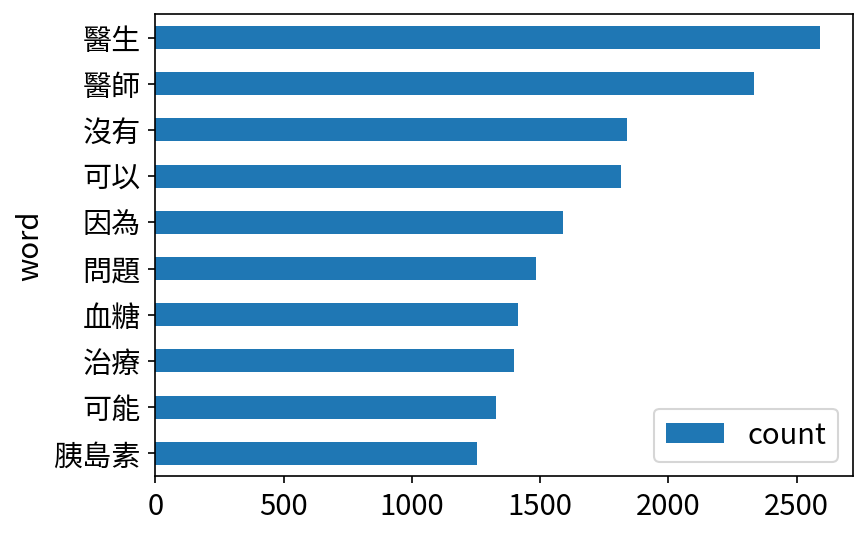

In [8]:
freq_df = pd.DataFrame(word_df['word'].value_counts()).sort_values(by = ['count'], ascending = False).reset_index()

# wordcloud的輸入須為dict，因此先將freq_df轉換成成dict
freq_dict = freq_df.set_index('word').to_dict()
freq_dict = freq_dict['count']

#去除少於兩個字的詞語
word_df = word_df.loc[word_df['word'].str.len() > 1]

freq_df = pd.DataFrame(word_df['word'].value_counts()).sort_values(by = ['count'], ascending = False).reset_index()

freq_df.head(10).plot.barh(x = 'word', y = 'count').invert_yaxis()

plt.show()

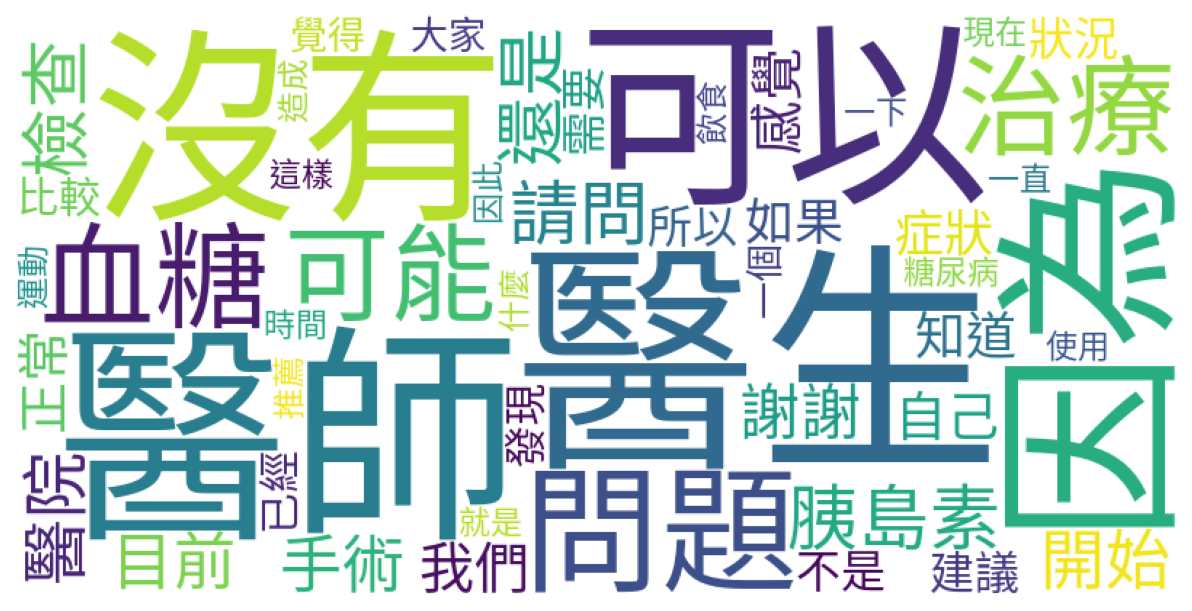

In [12]:
# wordcloud的輸入須為dict，因此先將freq_df轉換成成dict
freq_dict = freq_df.set_index('word').to_dict()
freq_dict = freq_dict['count']

# 繪製文字雲
wordcloud_no1 = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud_no1.generate_from_frequencies(freq_dict)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_no1)
plt.axis('off')
plt.show()

<span style="font-size: 18px;">以上為：去除單一字後的文字雲</span>

In [11]:
# 以檔案形式匯入通用的停用字檔案
# 將stopwords存成list
stopwords = [line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8').readlines()]
noStop_df = word_df[~word_df['word'].isin(stopwords)]
freq_df_nostop = pd.DataFrame(pd.value_counts(noStop_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()

<ipython-input-11-3968280734>:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df_nostop = pd.DataFrame(pd.value_counts(noStop_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()


(-0.5, 799.5, 399.5, -0.5)

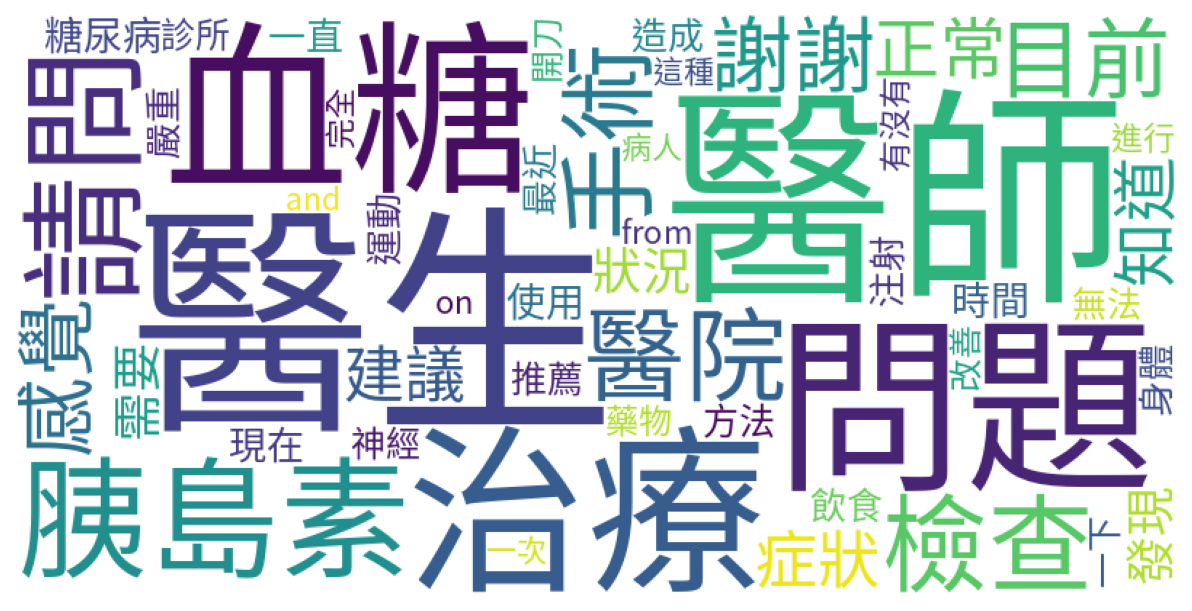

In [13]:
freq_dict_nostop = freq_df_nostop.set_index('word').to_dict()
freq_dict_nostop = freq_dict_nostop['count']

# 繪製文字雲
wordcloud_nostop = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud_nostop.generate_from_frequencies(freq_dict_nostop)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_nostop)
plt.axis('off')

<span style="font-size: 18px;">以上為：新增停用字後的文字雲</span>

<ipython-input-14-142443364>:8: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df_nostop_2 = pd.DataFrame(pd.value_counts(noStop_df_2['word'])).sort_values(by = ['count'], ascending = False).reset_index()


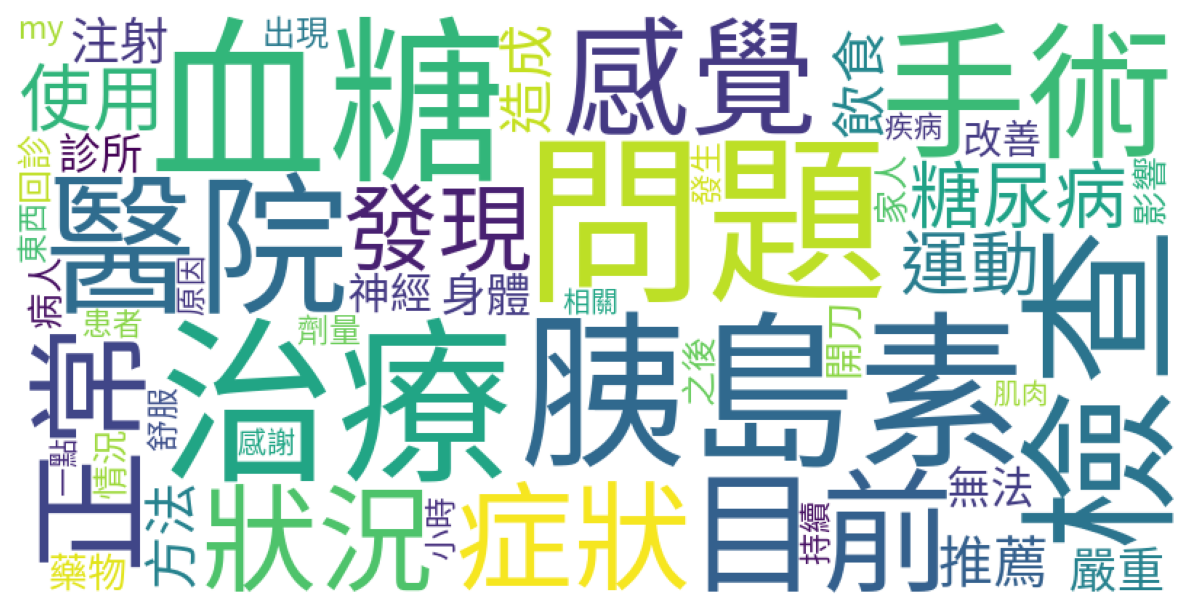

In [14]:
# 參數形式手動加入停用字
stopwords_manual = ["醫師","醫生","紀錄", "報告", "建議", "時間", "主訴",  "電話", "上述","可以","不是","還是","所以","我們","還是","可能","因為","請問","所以","覺得","謝謝","沒有","謝謝", "這種", "需要", "最近", "from", "on", "知道", "and", "一下", "一直", "完全", "有沒有", "一次", "進行", "這種", "現在"]
stopwords.extend(stopwords_manual)

noStop_df_2 = noStop_df[~noStop_df['word'].isin(stopwords)]

# 計算詞頻
freq_df_nostop_2 = pd.DataFrame(pd.value_counts(noStop_df_2['word'])).sort_values(by = ['count'], ascending = False).reset_index()

# wordcloud的輸入須為dict，因此先將freq_df轉換成成dict
freq_dict_nostop_2 = freq_df_nostop_2.set_index('word').to_dict()
freq_dict_nostop_2 = freq_dict_nostop_2['count']

# 繪製文字雲
wordcloud_nostop_2 = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud_nostop_2.generate_from_frequencies(freq_dict_nostop_2)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_nostop_2)
plt.axis('off')
plt.show()

<span style="font-size: 18px;">以上為：最終清理後的資料集</span>

<span style="font-size: 14px;">依據上述文字雲可以發現，討論內容多數集中在與糖尿病治療有關的關鍵詞，如「血糖」、「胰島素」、「飲食」、「檢查」及「手術」等詞頻較高。此外，「問題」、「感覺」、「症狀」、「治療」等詞也顯示出病患在治療過程中對身體狀況與醫療經驗的關注。</span>

##(二）Lexicon-Based情緒分析</span>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.colors import Colormap
from wordcloud import WordCloud
import jieba
%matplotlib inline

# plt.rcParams['font.sans-serif']=['SimHei'] #使 matplotilb 中文能正常顯示
fprop = fm.FontProperties(fname="SourceHanSansTW-Regular.otf")

# 設定整份 notebook 圖片的長寬與 dpi
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams["figure.dpi"] = 150

df = pd.read_csv("SMA_Final_Rawdata.csv")
df["artDate"] = pd.to_datetime(df["artDate"])
df['artDate'] = df['artDate'].dt.date

clear_df = df.copy()

#去除本次不會用到的欄位
drop_cols = ['system_id', 'artPoster', 'artCatagory', 'artComment', 'e_ip', 'insertedDate', 'dataSource']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode('sentence').reset_index(drop=True)

# 初始化斷詞引擎：不一定要設定，只使用內建效果也可以
# 參考網址：https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt

jieba.set_dictionary('dict.txt')

#去除句子中除了字母、數字、空白字符以外的符號
sent_df['sentence'] = sent_df['sentence'].str.replace(r'[^\w\s]+', '', regex=True).astype(str)

# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

word_df = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#去除少於兩個字的詞語
word_df = word_df.loc[word_df['word'].str.len() > 1]

stopwords = [line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8').readlines()]
stopwords_manual = ["醫師","醫生","紀錄", "報告", "建議", "時間", "主訴",  "電話", "上述","可以","不是","還是","所以","我們","還是","可能","因為","請問","所以","覺得","謝謝","沒有","謝謝", "這種", "需要", "最近", "from", "on", "知道", "and", "一下", "一直", "完全", "有沒有", "一次", "進行", "這種", "現在"]
stopwords.extend(stopwords_manual)

noStop_df = word_df[~word_df['word'].isin(stopwords)]

# 讀取情緒字典
liwc_dict = pd.read_csv("LIWC_CH.csv")
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})

ptt_liwc_df = pd.merge(noStop_df[["artUrl", "artDate", "artTitle", "artContent", "word"]], liwc_dict, how="left")

Building prefix dict from /content/drive/MyDrive/SMA_final/smaproject/dict.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/SMA_final/smaproject/dict.txt ...
Loading model from cache /tmp/jieba.u6124cfb9cf9551c68d326a6b8a86b527.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.u6124cfb9cf9551c68d326a6b8a86b527.cache
Loading model cost 1.118 seconds.
DEBUG:jieba:Loading model cost 1.118 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [18]:
sentiment_count = pd.DataFrame(
    ptt_liwc_df.groupby(["artDate", "sentiments"]).size()
).reset_index()

mask = (sentiment_count['sentiments'] == "positive") | (sentiment_count['sentiments'] == "negative")
sentiment_count = sentiment_count.loc[mask]

sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count.head(10)

artDate sentiments  size
2   2022-06-01   negative     7
3   2022-06-01   positive     3
8   2022-06-03   negative    13
9   2022-06-03   positive     2
13  2022-06-04   negative     2
14  2022-06-04   positive     8
16  2022-06-05   negative     4
17  2022-06-05   positive     4
20  2022-06-06   negative    17
21  2022-06-06   positive     2

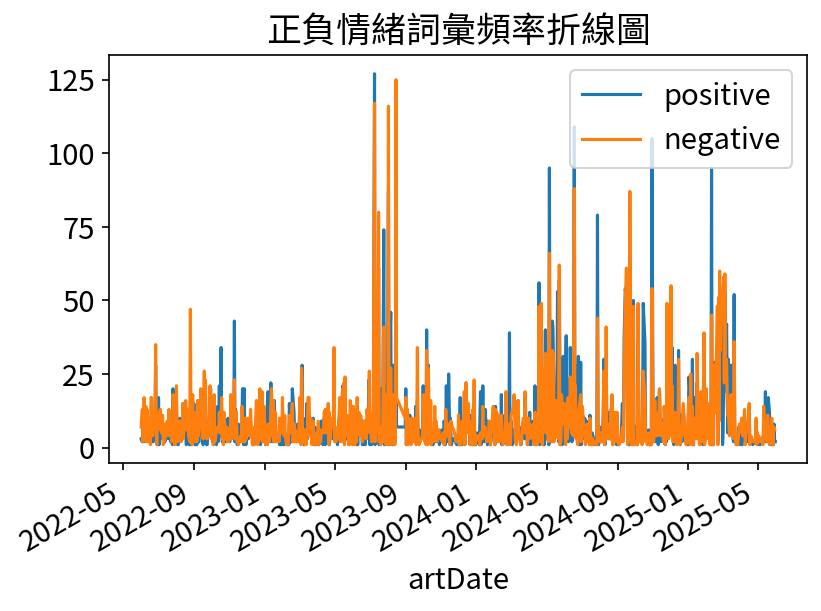

In [19]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒詞彙頻率折線圖")  # 記得加上才能顯示中文
plt.show()

<span style="font-size: 14px;">由上圖可知正負面情緒比例相當，我們推測是因為其內容包含像是一些疾病症狀等關鍵字的關係，讓他整體負面比例較高。


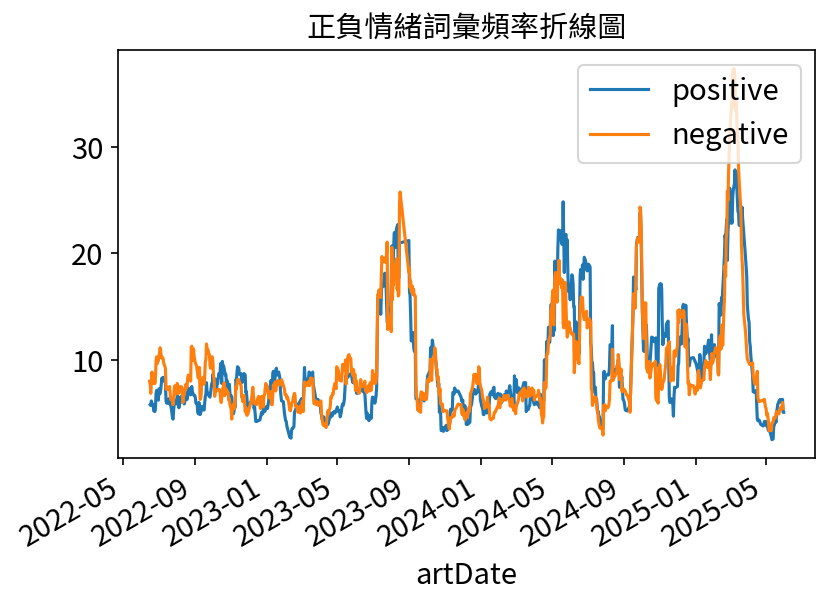

In [20]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒詞彙頻率折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

In [21]:
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("artDate")["size"].transform(lambda n: n / n.sum())
)
sentiment_count.head(10)

artDate sentiments  size     ratio
2   2022-06-01   negative     7  0.700000
3   2022-06-01   positive     3  0.300000
8   2022-06-03   negative    13  0.866667
9   2022-06-03   positive     2  0.133333
13  2022-06-04   negative     2  0.200000
14  2022-06-04   positive     8  0.800000
16  2022-06-05   negative     4  0.500000
17  2022-06-05   positive     4  0.500000
20  2022-06-06   negative    17  0.894737
21  2022-06-06   positive     2  0.105263

Text(0.5, 1.0, '正負情緒比例折線圖')

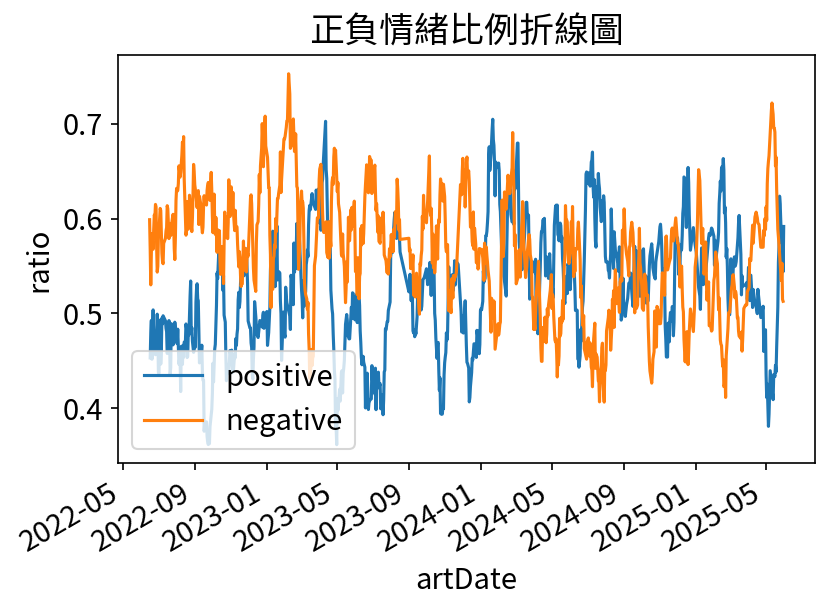

In [22]:
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

fig, ax = plt.subplots()

rolling_days = 14
ax.plot(pos["artDate"], pos["ratio"].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["ratio"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
plt.ylabel("ratio")
ax.legend(["positive", "negative"], loc="lower left")
fig.autofmt_xdate()
plt.title("正負情緒比例折線圖")

In [23]:
sentiment_count.head(10)

artDate sentiments  size     ratio
2   2022-06-01   negative     7  0.700000
3   2022-06-01   positive     3  0.300000
8   2022-06-03   negative    13  0.866667
9   2022-06-03   positive     2  0.133333
13  2022-06-04   negative     2  0.200000
14  2022-06-04   positive     8  0.800000
16  2022-06-05   negative     4  0.500000
17  2022-06-05   positive     4  0.500000
20  2022-06-06   negative    17  0.894737
21  2022-06-06   positive     2  0.105263

In [24]:
ptt_sentiment_value = (
    sentiment_count.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value.head()

artDate  negative  positive
0  2022-06-01       7.0       3.0
1  2022-06-03      13.0       2.0
2  2022-06-04       2.0       8.0
3  2022-06-05       4.0       4.0
4  2022-06-06      17.0       2.0

In [25]:
# sentiment 計算方式: positive - negative
ptt_sentiment_value["sentiment_value"] = (
    ptt_sentiment_value["positive"]
    - ptt_sentiment_value["negative"]
)
ptt_sentiment_value.head()

artDate  negative  positive  sentiment_value
0  2022-06-01       7.0       3.0             -4.0
1  2022-06-03      13.0       2.0            -11.0
2  2022-06-04       2.0       8.0              6.0
3  2022-06-05       4.0       4.0              0.0
4  2022-06-06      17.0       2.0            -15.0

Text(0.5, 1.0, '正負情緒分數趨勢折線圖')

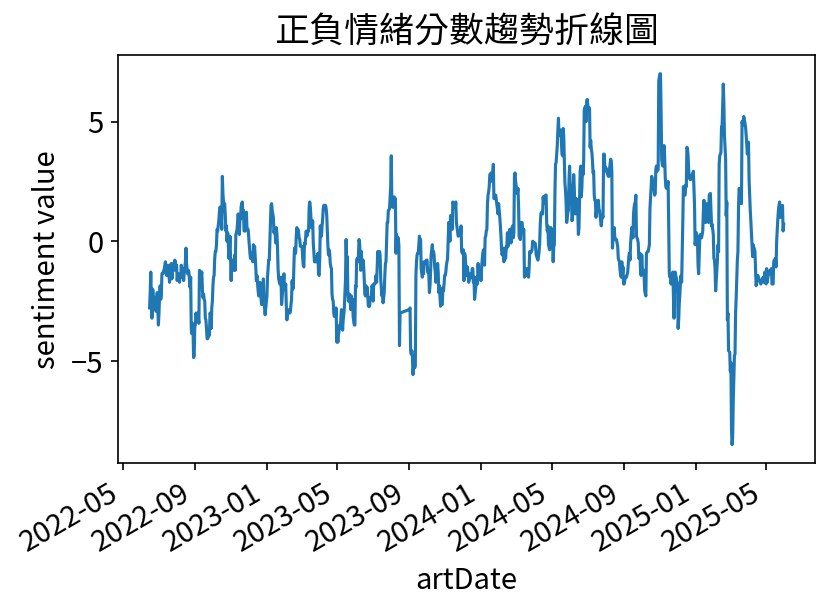

In [26]:
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_sentiment_value["artDate"], ptt_sentiment_value["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()
plt.title("正負情緒分數趨勢折線圖")

In [27]:
# 以文章為單位
sentiment_count_by_article = pd.DataFrame(
    ptt_liwc_df.groupby(["artUrl", "sentiments"]).size()
).reset_index()
sentiment_count_by_article = sentiment_count_by_article.rename(columns={0: "size"})
sentiment_count_by_article.head(10)

artUrl sentiments  size
0  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...     affect     2
1  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...        anx     1
2  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...   negative     1
3  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...   positive     1
4  https://www.ptt.cc/bbs/Doctor-Info/M.165408835...     affect     2
5  https://www.ptt.cc/bbs/Doctor-Info/M.165408835...   negative     1
6  https://www.ptt.cc/bbs/Doctor-Info/M.165408835...        sad     1
7  https://www.ptt.cc/bbs/Doctor-Info/M.165409545...     affect     6
8  https://www.ptt.cc/bbs/Doctor-Info/M.165409545...        anx     2
9  https://www.ptt.cc/bbs/Doctor-Info/M.165409545...   negative     3

In [28]:
ptt_sentiment_value_by_article = (
    sentiment_count_by_article.pivot_table(
        index="artUrl", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value_by_article.head()

artUrl  affect  anger  anx  \
0  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...     2.0    0.0  1.0   
1  https://www.ptt.cc/bbs/Doctor-Info/M.165408835...     2.0    0.0  0.0   
2  https://www.ptt.cc/bbs/Doctor-Info/M.165409545...     6.0    0.0  2.0   
3  https://www.ptt.cc/bbs/Doctor-Info/M.165409720...     2.0    0.0  1.0   
4  https://www.ptt.cc/bbs/Doctor-Info/M.165423091...     4.0    0.0  0.0   

   negative  positive  sad  
0       1.0       1.0  0.0  
1       1.0       0.0  1.0  
2       3.0       2.0  3.0  
3       2.0       0.0  0.0  
4       3.0       1.0  1.0

In [29]:
# sentiment 計算方式: positive - negative
ptt_sentiment_value_by_article["sentiment_value"] = (
    ptt_sentiment_value_by_article["positive"]
    - ptt_sentiment_value_by_article["negative"]
)
ptt_sentiment_value_by_article.head()

artUrl  affect  anger  anx  \
0  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...     2.0    0.0  1.0   
1  https://www.ptt.cc/bbs/Doctor-Info/M.165408835...     2.0    0.0  0.0   
2  https://www.ptt.cc/bbs/Doctor-Info/M.165409545...     6.0    0.0  2.0   
3  https://www.ptt.cc/bbs/Doctor-Info/M.165409720...     2.0    0.0  1.0   
4  https://www.ptt.cc/bbs/Doctor-Info/M.165423091...     4.0    0.0  0.0   

   negative  positive  sad  sentiment_value  
0       1.0       1.0  0.0              0.0  
1       1.0       0.0  1.0             -1.0  
2       3.0       2.0  3.0             -1.0  
3       2.0       0.0  0.0             -2.0  
4       3.0       1.0  1.0             -2.0

In [30]:
ptt_sentiment_value_by_article['sentiment_class'] = ptt_sentiment_value_by_article['sentiment_value'].apply(lambda x: "正向" if x > 0 else "負向" )
ptt_sentiment_value_by_article.head(10)

artUrl  affect  anger  anx  \
0  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...     2.0    0.0  1.0   
1  https://www.ptt.cc/bbs/Doctor-Info/M.165408835...     2.0    0.0  0.0   
2  https://www.ptt.cc/bbs/Doctor-Info/M.165409545...     6.0    0.0  2.0   
3  https://www.ptt.cc/bbs/Doctor-Info/M.165409720...     2.0    0.0  1.0   
4  https://www.ptt.cc/bbs/Doctor-Info/M.165423091...     4.0    0.0  0.0   
5  https://www.ptt.cc/bbs/Doctor-Info/M.165423161...    11.0    1.0  4.0   
6  https://www.ptt.cc/bbs/Doctor-Info/M.165435519...     3.0    0.0  0.0   
7  https://www.ptt.cc/bbs/Doctor-Info/M.165435794...     3.0    0.0  0.0   
8  https://www.ptt.cc/bbs/Doctor-Info/M.165435804...     4.0    0.0  1.0   
9  https://www.ptt.cc/bbs/Doctor-Info/M.165443271...     3.0    0.0  0.0   

   negative  positive  sad  sentiment_value sentiment_class  
0       1.0       1.0  0.0              0.0              負向  
1       1.0       0.0  1.0             -1.0              負向  
2       3.0       2.0  3.0             -1.0              負向  
3       2.0       0.0  0.0             -2.0              負向  
4       3.0       1.0  1.0             -2.0              負向  
5      10.0       1.0  2.0             -9.0              負向  
6       0.0       3.0  0.0              3.0              正向  
7       0.0       3.0  0.0              3.0              正向  
8       2.0       2.0  0.0              0.0              負向  
9       2.0       1.0  0.0             -1.0              負向

In [31]:
clear_df_sentiment = pd.merge(df, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
clear_df_sentiment["artDate"] = pd.to_datetime(clear_df_sentiment["artDate"])
clear_df_sentiment['artDate'] = clear_df_sentiment['artDate'].dt.date

clear_df_sentiment.head()

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...   
1          2  https://www.ptt.cc/bbs/Doctor-Info/M.165408835...   
2          3  https://www.ptt.cc/bbs/Doctor-Info/M.165409545...   
3          4  https://www.ptt.cc/bbs/Doctor-Info/M.165409720...   
4          5  https://www.ptt.cc/bbs/Doctor-Info/M.165423091...   

                 artTitle     artDate    artPoster  artCatagory  \
0          [問題]胸前出現一大片小紅點  2022-06-01     wtin1414  Doctor_Info   
1          [問題]確診後咳嗽一直好不了  2022-06-01        meaa3  Doctor_Info   
2  [請益]打玻尿酸有用嗎？（十字韌帶、半月板）  2022-06-01    rainsky25  Doctor_Info   
3      [問題]請問傷口觸碰到血液的感染問題  2022-06-01     abcd7777  Doctor_Info   
4         [請益]左手麻左腳麻已去過急診  2022-06-03  valsechopin  Doctor_Info   

                                          artContent  \
0  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   
1  從5/11號確診新冠開始看診吃藥\n\n但咳嗽就一直好不了，中西醫都去看過了\n\n現在雖然...   
2  去年底因為運動時受傷導致左膝ACL. PCL都部分斷裂，以及外側半月板破裂\n在受傷後一週進...   
3  各位醫師晚安\n\n我想請問，若手上有傷口，觸碰到別人的血液，會不會有肝炎或HIV、AIDS...   
4  昨天家人凌晨4:00 睡醒起來滑手機 左手突然麻\n接著左腳也麻起來 輕微無力\n\n白天去...   

                                          artComment             e_ip  \
0  [{"cmtStatus": "推", "cmtPoster": "paul0303", "...     1.168.27.141   
1  [{"cmtStatus": "→", "cmtPoster": "w405256", "c...     123.192.82.4   
2                                                 []    49.216.21.136   
3  [{"cmtStatus": "→", "cmtPoster": "mrccw", "cmt...   180.217.157.77   
4                                                 []  180.217.202.202   

          insertedDate dataSource sentiment_class  
0  2022-06-02 01:09:15        ptt              負向  
1  2022-06-02 01:09:15        ptt              負向  
2  2022-06-02 01:09:15        ptt              負向  
3  2022-06-02 01:09:15        ptt              負向  
4  2022-06-04 01:09:01        ptt              負向

In [32]:
sentiment_art_count = pd.DataFrame(
    clear_df_sentiment.groupby(["artDate", "sentiment_class"]).size()
).reset_index()
sentiment_art_count = sentiment_art_count.rename(columns={0: "size"})
sentiment_art_count = sentiment_art_count.sort_values(["artDate"])
sentiment_art_count

artDate sentiment_class  size
0     2022-06-01              負向     4
1     2022-06-03              負向     2
2     2022-06-04              正向     2
3     2022-06-04              負向     1
4     2022-06-05              正向     1
...          ...             ...   ...
1343  2025-05-28              負向     2
1344  2025-05-29              正向     1
1345  2025-05-29              負向     1
1346  2025-05-30              負向     2
1347  2025-05-31              正向     1

[1348 rows x 3 columns]

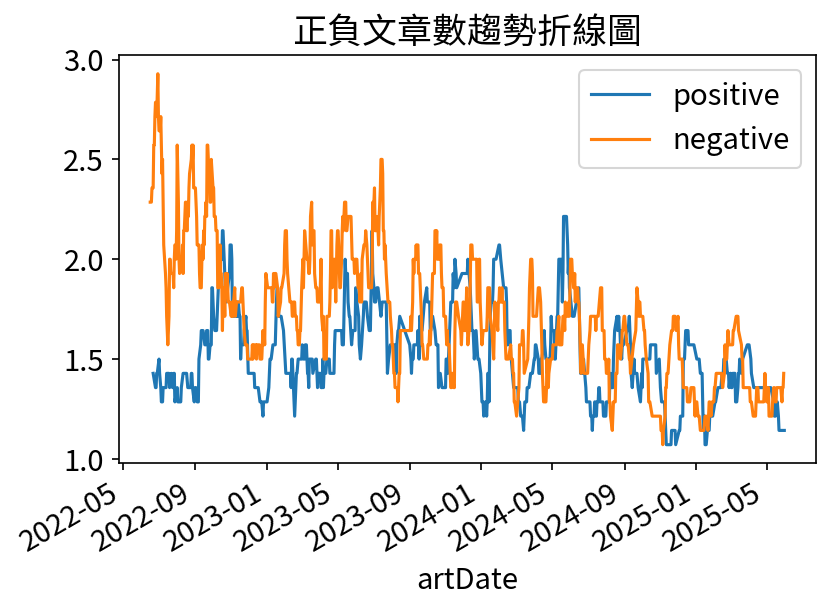

In [33]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_art_count[sentiment_art_count["sentiment_class"] == "正向"]
neg = sentiment_art_count[sentiment_art_count["sentiment_class"] == "負向"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])
# ax.plot(pos["artDate"], pos['size'], color=colors[0])
# ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負文章數趨勢折線圖")  # 記得加上才能顯示中文
plt.show()

In [34]:
word_count = ptt_liwc_df.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)

word_count.head(10)

word sentiments  size
325    問題   negative  1495
324    問題     affect  1495
1004   治療     affect  1408
1005   治療   positive  1408
350    嚴重     affect   571
351    嚴重   negative   571
835    改善     affect   504
836    改善   positive   504
1412   舒服   positive   370
1411   舒服     affect   370

In [35]:
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_pos.head(15)

word sentiments  size
1005   治療   positive  1408
836    改善   positive   504
1412   舒服   positive   370
671    感謝   positive   345
517    希望   positive   298
123    健康   positive   269
519    幫助   positive   243
188    分享   positive   236
485    容易   positive   216
1587   重要   positive   209
1255   確定   positive   181
928    朋友   positive   169
521    幫忙   positive   154
918    有效   positive   142
1039   清楚   positive   128

In [36]:
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
word_of_neg.head(15)

word sentiments  size
325    問題   negative  1495
351    嚴重   negative   571
1212   疼痛   negative   305
786    控制   negative   299
136    傷口   negative   288
822    擔心   negative   241
1610   降低   negative   210
1672   風險   negative   156
1187   異常   negative   154
699    懷疑   negative   120
377    壓力   negative   108
50     不適   negative   107
1715   麻煩   negative   106
262    受傷   negative    99
1080   無力   negative    97

<ipython-input-37-644546242>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(pos["word"])
<ipython-input-37-644546242>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(neg["word"])


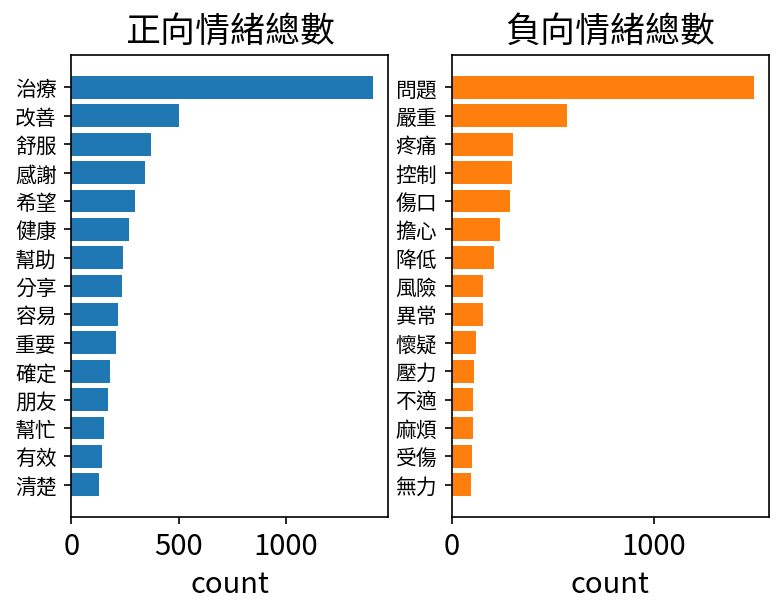

In [37]:
pos = word_of_pos.head(15).sort_values(["size"], ascending=True)
neg = word_of_neg.head(15).sort_values(["size"], ascending=True)

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"])
ax[0].set_title("正向情緒總數")

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"])
ax[1].set_title("負向情緒總數")

# 避免 yticklabel 重疊錯位（推薦）
for a in ax:
    a.tick_params(axis='y', labelsize=10)
    a.set_xlim(left=0)

In [38]:
filtered_df = sent_df[sent_df['sentence'].str.contains('問題', na=False)]
filtered_df.head()

artUrl  \
58   https://www.ptt.cc/bbs/Doctor-Info/M.165423091...   
61   https://www.ptt.cc/bbs/Doctor-Info/M.165423091...   
65   https://www.ptt.cc/bbs/Doctor-Info/M.165423161...   
170  https://www.ptt.cc/bbs/Doctor-Info/M.165444443...   
178  https://www.ptt.cc/bbs/Doctor-Info/M.165444632...   

                    artTitle     artDate  \
58           [請益]左手麻左腳麻已去過急診  2022-06-03   
61           [請益]左手麻左腳麻已去過急診  2022-06-03   
65   [請益]打完BNT之後，瘋狂嘴破，開始吃秋水仙  2022-06-03   
170            [問題]右胸痛但X光沒問題  2022-06-05   
178       [問題]糖尿病足開刀完可以當日出院嗎  2022-06-06   

                                            artContent  \
58   昨天家人凌晨4:00 睡醒起來滑手機 左手突然麻\n接著左腳也麻起來 輕微無力\n\n白天去...   
61   昨天家人凌晨4:00 睡醒起來滑手機 左手突然麻\n接著左腳也麻起來 輕微無力\n\n白天去...   
65   各位前輩端午節快樂\n\n小弟前陣子已發一篇文，當時來請教大家嘴破的問題，大家也是建議去看風...   
170  大家好\n右胸大概痛了有接近兩個月 最近開始越來越痛\n呼吸太大力或是某一個特定的點按壓的話...   
178  各位版友好：\n\n家父因糖尿病足一直惡化\n整外醫生說須將剩下的腳趾切除（都已發黑）\n但...   

                                              sentence  
58   發生手腳麻之前 家人前2天有因為頭暈照頸椎X光也是正常當時醫生表示可能是肌肉問題 右邊脖子的...  
61                   請問腦部電腦斷層跟血液檢查如果正常是不是能排除腦中風這樣的大問題呢  
65                                        當時來請教大家嘴破的問題  
170  大家好右胸大概痛了有接近兩個月 最近開始越來越痛呼吸太大力或是某一個特定的點按壓的話會痛前幾...  
178                                              所以沒問題

In [39]:
for sentence in filtered_df['sentence'].to_list():
    print(sentence)
    print("=========================")

發生手腳麻之前 家人前2天有因為頭暈照頸椎X光也是正常當時醫生表示可能是肌肉問題 右邊脖子的肌肉的確摸下去有脹痛感
請問腦部電腦斷層跟血液檢查如果正常是不是能排除腦中風這樣的大問題呢
當時來請教大家嘴破的問題
大家好右胸大概痛了有接近兩個月 最近開始越來越痛呼吸太大力或是某一個特定的點按壓的話會痛前幾天掛了胸腔外科 但醫生看完X光只說一切都沒問題 也沒長什麼東西 疑似是肌肉疲勞或肌肉酸痛因為我跟他說我有在重訓
所以沒問題
我自己本身是從事輪班工作以前都沒有睡眠障礙的問題
一顆可以撐個幾天不是問題
心想會不會腎出問題
請問這有可能是什麼問題
腎有問題該看哪科
因為媽媽還有其他問題
     先說我沒有要對醫生幹嘛  只是很好奇     這到底是麻藥上的量的問題   還是醫生基於速戰速決 避免病患亂眨眼造成受傷     所以直接騙我說不痛嗎
     或是說這是上麻藥技術  或是麻藥效力時間的問題呢
想請問板上有人有這個問題
但也沒有肚子痛也沒有拉肚子就是秒急覺得很困擾但不知這算不算哪裡出了問題
這個問題困擾我一個月了我會從晚上1030分睡到凌晨12點醒來後就整夜無法入睡
右耳則沒有這個問題
這問題只要在大量換氣的運動中就會非常明顯
醫生都說沒問題
醫生說不是骨頭問題的話
同學檢查出早期心室收縮   每分鐘200多下奇怪的是不是一整天白天大致上都沒問題  但每天到下午500過後就開始發作連晚上睡覺也是  心臟都在快速亂跳亂跳的時候會眼前都黑掉 快要昏過去那種感覺
但問題是醫生電燒手術都在早上執行   但同學都是黃昏後才發作因此長庚跟振興都看過 長庚醫生說他5點下班然後轉去振興 安排早上電燒  也無法執行醫師的說法是  心律正常的時候無法電燒  但晚上發作的時候 又沒有醫生肯做
因於高榮泌尿外科檢查腎臟問題
有就醫暫時診斷為急性咽喉扁桃腺發炎本身有長年過敏性鼻炎慢性扁桃腺問題有吃兩天止痛消腫化痰藥
真有安全到殘留人體也不會有問題嗎
或是是否有推薦台中或彰化的可治療長新冠 失眠問題以及咳嗽
驗光師用高階儀器發現我有隱斜視55個稜鏡雖然不知道怎麼會忽然出現斜視但感覺應該不會造成這麼嚴重的症狀我一直覺得是神經的問題但問了大概10個神經科醫生斗六臺大台南奇美他們都說看起來不像
之後患處就有淋巴水腫問題
從鼻子進入到喉嚨滿深的結果應該是沒什麼問題
最近確診 算輕症而已但有個問題確診

In [40]:
# 設定要移除的字詞列表
words_to_remove = ['懷疑','希望','重要','確定','異常','治療','問題','降低']
# 使用 ~ 運算子和 isin() 方法過濾掉包含在 words_to_remove 列表中的行
liwc_dict_revise = liwc_dict[~liwc_dict['word'].isin(words_to_remove)]
# 使用更新後的情緒字典 merge
ptt_liwc_df_revise = pd.merge(noStop_df[["artUrl", "artDate", "artTitle", "artContent","word"]], liwc_dict_revise, how="left")
ptt_liwc_df_revise.head()

artUrl     artDate  \
0  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...  2022-06-01   
1  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...  2022-06-01   
2  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...  2022-06-01   
3  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...  2022-06-01   
4  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...  2022-06-01   

         artTitle                                         artContent word  \
0  [問題]胸前出現一大片小紅點  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   如題   
1  [問題]胸前出現一大片小紅點  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   剛換   
2  [問題]胸前出現一大片小紅點  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   工作   
3  [問題]胸前出現一大片小紅點  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...  前一份   
4  [問題]胸前出現一大片小紅點  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   工作   

  sentiments  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

<ipython-input-41-1871694235>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(pos["word"])
<ipython-input-41-1871694235>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(neg["word"])


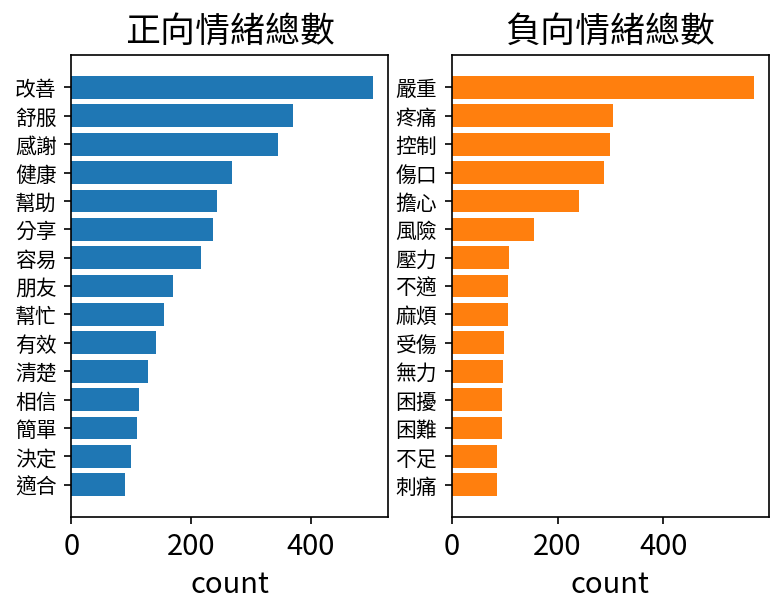

In [41]:
word_count = ptt_liwc_df_revise.groupby(["word", "sentiments"]).size().reset_index()

word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)

word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]

pos = word_of_pos.head(15).sort_values(["size"], ascending=True)
neg = word_of_neg.head(15).sort_values(["size"], ascending=True)

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"])
ax[0].set_title("正向情緒總數")

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"])
ax[1].set_title("負向情緒總數")

# 避免 yticklabel 重疊錯位（推薦）
for a in ax:
    a.tick_params(axis='y', labelsize=10)
    a.set_xlim(left=0)

Text(0.5, 1.0, '正負情緒分數趨勢折線圖')

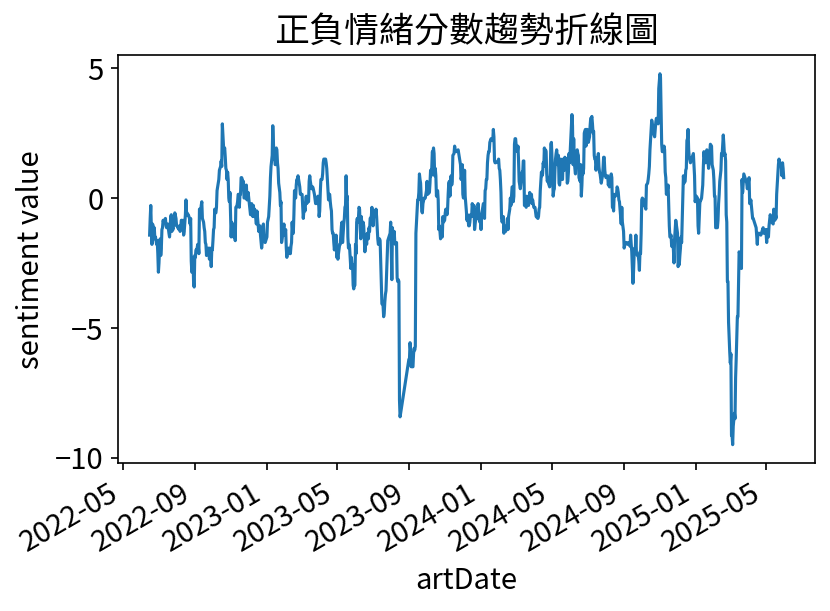

In [42]:
sentiment_count_revise = pd.DataFrame(
    ptt_liwc_df_revise.groupby(["artDate", "sentiments"]).size()
).reset_index()

mask = (sentiment_count_revise['sentiments'] == "positive") | (sentiment_count_revise['sentiments'] == "negative")
sentiment_count_revise = sentiment_count_revise.loc[mask]

sentiment_count_revise = sentiment_count_revise.rename(columns={0: "size"})
sentiment_count_revise = sentiment_count_revise.sort_values(["artDate"])

ptt_sentiment_value_revise = (
    sentiment_count_revise.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)

# sentiment 計算方式: positive - negative
ptt_sentiment_value_revise["sentiment_value"] = (
    ptt_sentiment_value_revise["positive"]
    - ptt_sentiment_value_revise["negative"]
)

# 繪製情緒分數趨勢圖
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_sentiment_value_revise["artDate"], ptt_sentiment_value_revise["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()
plt.title("正負情緒分數趨勢折線圖")

In [43]:
ptt_liwc_df_revise = pd.merge(ptt_liwc_df_revise, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
ptt_liwc_df_revise.head()

artUrl     artDate  \
0  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...  2022-06-01   
1  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...  2022-06-01   
2  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...  2022-06-01   
3  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...  2022-06-01   
4  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...  2022-06-01   

         artTitle                                         artContent word  \
0  [問題]胸前出現一大片小紅點  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   如題   
1  [問題]胸前出現一大片小紅點  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   剛換   
2  [問題]胸前出現一大片小紅點  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   工作   
3  [問題]胸前出現一大片小紅點  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...  前一份   
4  [問題]胸前出現一大片小紅點  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   工作   

  sentiments sentiment_class  
0        NaN              負向  
1        NaN              負向  
2        NaN              負向  
3        NaN              負向  
4        NaN              負向

In [44]:
sent_df = pd.merge(sent_df, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
sent_df.head()

artUrl        artTitle  \
0  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...  [問題]胸前出現一大片小紅點   
1  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...  [問題]胸前出現一大片小紅點   
2  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...  [問題]胸前出現一大片小紅點   
3  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...  [問題]胸前出現一大片小紅點   
4  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...  [問題]胸前出現一大片小紅點   

      artDate                                         artContent  \
0  2022-06-01  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   
1  2022-06-01  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   
2  2022-06-01  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   
3  2022-06-01  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   
4  2022-06-01  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   

            sentence sentiment_class  
0                 如題              負向  
1             最近剛換工作              負向  
2        前一份工作是待在冷氣房              負向  
3            幾乎沒什麼勞力              負向  
4  所以已經長時間沒流汗下班也懶得運動              負向

In [45]:
date = "2023-08-01"
end_date = "2023-10-31"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & (
    ptt_liwc_df_revise['sentiment_class'] == "負向")

ptt_df_wc = ptt_liwc_df_revise.loc[mask]
ptt_df_wc.head(10)

artUrl     artDate  \
77742  https://www.ptt.cc/bbs/Doctor-Info/M.169087519...  2023-08-01   
77743  https://www.ptt.cc/bbs/Doctor-Info/M.169087519...  2023-08-01   
77744  https://www.ptt.cc/bbs/Doctor-Info/M.169087519...  2023-08-01   
77745  https://www.ptt.cc/bbs/Doctor-Info/M.169096578...  2023-08-02   
77746  https://www.ptt.cc/bbs/Doctor-Info/M.169096578...  2023-08-02   
77747  https://www.ptt.cc/bbs/Doctor-Info/M.169096578...  2023-08-02   
77748  https://www.ptt.cc/bbs/Doctor-Info/M.169096578...  2023-08-02   
77749  https://www.ptt.cc/bbs/Doctor-Info/M.169096578...  2023-08-02   
77750  https://www.ptt.cc/bbs/Doctor-Info/M.169096578...  2023-08-02   
77751  https://www.ptt.cc/bbs/Doctor-Info/M.169096578...  2023-08-02   

                        artTitle  \
77742           [問題]像這樣左眼是出了什麼問題   
77743           [問題]像這樣左眼是出了什麼問題   
77744           [問題]像這樣左眼是出了什麼問題   
77745  [推薦]《伯恩斯坦醫師的糖尿病治療方法》選譯3-3   
77746  [推薦]《伯恩斯坦醫師的糖尿病治療方法》選譯3-3   
77747  [推薦]《伯恩斯坦醫師的糖尿病治療方法》選譯3-3   
77748  [推薦]《伯恩斯坦醫師的糖尿病治療方法》選譯3-3   
77749  [推薦]《伯恩斯坦醫師的糖尿病治療方法》選譯3-3   
77750  [推薦]《伯恩斯坦醫師的糖尿病治療方法》選譯3-3   
77751  [推薦]《伯恩斯坦醫師的糖尿病治療方法》選譯3-3   

                                              artContent  word sentiments  \
77742                             像這樣左眼像出了什麼問題，謝謝您回答\n\n    左眼        NaN   
77743                             像這樣左眼像出了什麼問題，謝謝您回答\n\n    問題        NaN   
77744                             像這樣左眼像出了什麼問題，謝謝您回答\n\n    回答        NaN   
77745  《伯恩斯坦醫師的糖尿病治療方法》第四版選譯03-3\n　　以下是從《伯恩斯坦醫師的糖尿病治療...  伯恩斯坦        NaN   
77746  《伯恩斯坦醫師的糖尿病治療方法》第四版選譯03-3\n　　以下是從《伯恩斯坦醫師的糖尿病治療...   糖尿病        NaN   
77747  《伯恩斯坦醫師的糖尿病治療方法》第四版選譯03-3\n　　以下是從《伯恩斯坦醫師的糖尿病治療...    治療        NaN   
77748  《伯恩斯坦醫師的糖尿病治療方法》第四版選譯03-3\n　　以下是從《伯恩斯坦醫師的糖尿病治療...    方法        NaN   
77749  《伯恩斯坦醫師的糖尿病治療方法》第四版選譯03-3\n　　以下是從《伯恩斯坦醫師的糖尿病治療...   第四版        NaN   
77750  《伯恩斯坦醫師的糖尿病治療方法》第四版選譯03-3\n　　以下是從《伯恩斯坦醫師的糖尿病治療...    選譯        NaN   
77751  《伯恩斯坦醫師的糖尿病治療方法》第四版選譯03-3\n　　以下是從《伯恩斯坦醫師的糖尿病治療...   033        NaN   

      sentiment_class  
77742              負向  
77743              負向  
77744              負向  
77745              負向  
77746              負向  
77747              負向  
77748              負向  
77749              負向  
77750              負向  
77751              負向

In [46]:
date = "2023-08-01"
end_date = "2023-10-31"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & (
    ptt_liwc_df_revise['sentiment_class'] == "負向")

ptt_df_wc = ptt_liwc_df_revise.loc[mask, ["artDate", "word"]]


word_count_count = pd.DataFrame(
    ptt_df_wc.groupby(["word"]).size()
).reset_index().rename(columns={0: "size"})

word_count_count = word_count_count.sort_values(by='size', ascending=False)
word_count_count.head(10)

word  size
3570   血糖   137
1379   問題   137
2554   檢查   113
2570   正常    81
3379  胰島素    81
3932   造成    72
2188   控制    70
4053   醫院    70
2924   疼痛    69
2233   擔心    69

(-0.5, 1599.5, 799.5, -0.5)

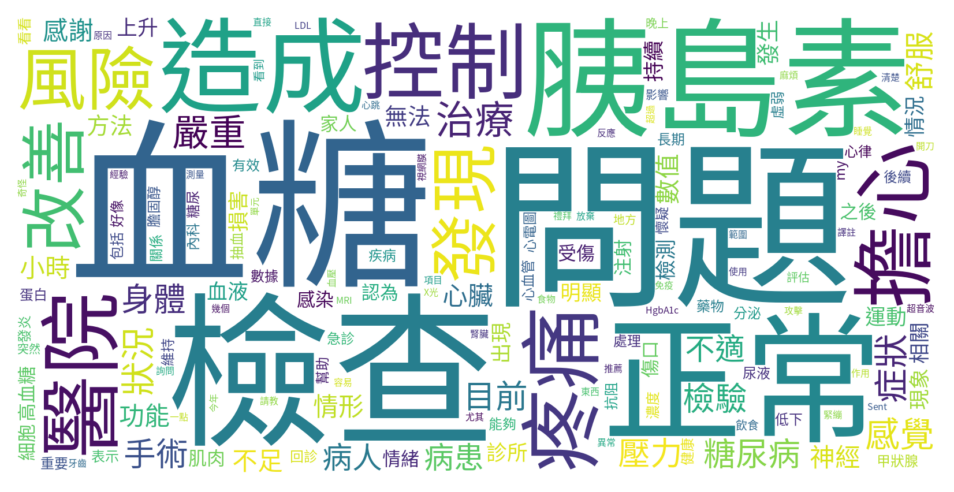

In [51]:
# wordcloud 的 input 是 dictionary
font_path = "SourceHanSansTW-Regular.otf"  # 中文字型路徑
wc_dict = dict(zip(word_count_count['word'], word_count_count['size']))
cloud = WordCloud(scale = 4, max_words=200, background_color="white", font_path=font_path)
cloud.generate_from_frequencies(wc_dict)
# 繪圖
plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
# plt.show()

(-0.5, 1599.5, 799.5, -0.5)

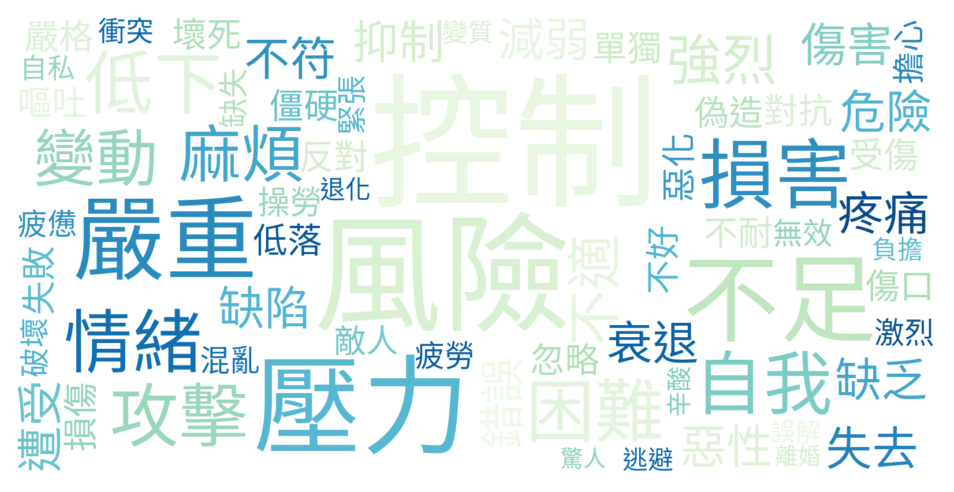

In [52]:
date = "2023-08-01"
end_date = "2023-10-31"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & ( # 時間區間
    ptt_liwc_df_revise['sentiment_class'] == "負向")  & ( # 負面文章
    ptt_liwc_df_revise['artContent'].str.contains('血糖')) & ( # 內文包含血糖
    ptt_liwc_df_revise["sentiments"] == "negative") # 負面情緒字

ptt_df_wc = ptt_liwc_df_revise.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()

# wordcloud 的 input 是 dictionary
cloud = WordCloud(scale = 4, max_words=200, background_color="white", font_path=font_path, colormap="GnBu")
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(
    cloud,
    interpolation="bilinear"
)
plt.axis("off")
# plt.show()

In [53]:
date = "2023-08-01"
end_date = "2023-10-31"
mask = (sent_df['artDate'] >= pd.Timestamp(date).date()) & (
    sent_df['artDate'] <= pd.Timestamp(end_date).date()) & (
    sent_df['sentiment_class'] == "負向") & (
    sent_df['artContent'].str.contains('血糖')) & (
    sent_df['sentence'].str.contains('壓力')) # 包含「壓力」的句子

df_ = sent_df.loc[mask, ["artDate", "artContent", "sentence"]]
index_list = df_.index.tolist()


# 取得前後各5筆的索引 => 目的為查看包含該詞彙句子的上下文
surrounding_indices = []
for index in index_list:
    surrounding_indices.extend(range(index - 5, index + 6))

# 去除重複的索引，並確保不超出範圍
surrounding_indices = list(set(filter(lambda x: x >= 0 and x < len(sent_df), surrounding_indices)))

# 依據索引取得相應的資料
result_df = sent_df.iloc[surrounding_indices].sort_index()
result_df[['artTitle', 'sentence', 'sentiment_class']]

artTitle                             sentence  \
17555  [推薦]《伯恩斯坦醫師的糖尿病治療方法》選譯06                他們持續了好幾年每天時不時的飯後昏迷和痙攣   
17556  [推薦]《伯恩斯坦醫師的糖尿病治療方法》選譯06               一直到他們來找我看診後才診斷出這個嚴重的問題   
17557  [推薦]《伯恩斯坦醫師的糖尿病治療方法》選譯06                      在單元22會提出各種治療的方法   
17558  [推薦]《伯恩斯坦醫師的糖尿病治療方法》選譯06                  即使是胃輕癱這種造成血糖難以預測的狀況   
17559  [推薦]《伯恩斯坦醫師的糖尿病治療方法》選譯06               我們還是可以有效大幅度改善血糖使之趨向正常化   
...                         ...                                  ...   
17742  [推薦]《伯恩斯坦醫師的糖尿病治療方法》選譯06                              以腎臓感染為例   
17743  [推薦]《伯恩斯坦醫師的糖尿病治療方法》選譯06               往往一個晚上要注射高達3倍的劑量才能穩定血糖   
17744  [推薦]《伯恩斯坦醫師的糖尿病治療方法》選譯06               　　如果病人血糖在無預期下高出正常血糖達1週   
17745  [推薦]《伯恩斯坦醫師的糖尿病治療方法》選譯06                           就很有可能受到了感染   
17746  [推薦]《伯恩斯坦醫師的糖尿病治療方法》選譯06  我自己則是在喉嚨痛或感冒前的24小時血糖就會開始升高以我自己的家庭為例   

      sentiment_class  
17555              負向  
17556              負向  
17557              負向  
17558              負向  
17559              負向  
...               ...  
17742              負向  
17743              負向  
17744              負向  
17745              負向  
17746              負向  

[67 rows x 3 columns]

##(三）字詞相關性</span><br>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import jieba
import jieba.analyse
import math
from nltk import ngrams, FreqDist
from collections import Counter, namedtuple

import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

# 設定圖的中文字體 (無法顯示的話可以試試‘Microsoft JhengHei’字體)
# 也可參考：https://pyecontech.com/2020/03/27/python_matplotlib_chinese/
plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms'] #使圖中中文能正常顯示
plt.rcParams['axes.unicode_minus'] = False #使負號能夠顯示

#匯入資料
df = pd.read_csv("SMA_Final_Rawdata.csv", encoding = 'UTF-8')

import re

MetaData = df.copy()

# 去除一些不需要的欄位
MetaData = MetaData.drop(['artPoster', 'artCatagory', 'artComment', 'e_ip', 'insertedDate', 'dataSource'], axis=1)

# 清洗 artContent 欄位，只保留中文字
MetaData['sentence'] = MetaData['artContent'].apply(lambda x: re.sub(r'[^\u4e00-\u9fff]+', '', str(x)) if isinstance(x, str) else '')

# 設定繁體中文詞庫
jieba.set_dictionary('dict.txt.big')

# 新增stopwords
with open('stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

# 設定斷詞 function
def getToken(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1] # 篩選掉停用字與字元數小於1的詞彙

    return seg_list

data = MetaData.copy()

# 斷詞、去除停用字並將word欄位展開
data['word'] = data.sentence.apply(getToken).explode('word')
food_df = MetaData.copy()

# 保留需要的欄位
food_df = food_df.loc[:,["system_id", "sentence"]]

# 改成使用空格連接斷完的詞
food_df['word'] = food_df.sentence.apply(getToken).map(' '.join)

Building prefix dict from /content/drive/MyDrive/SMA_final/smaproject/dict.txt.big ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/SMA_final/smaproject/dict.txt.big ...
Dumping model to file cache /tmp/jieba.u6ad6684f2f7f884767d377d933a79618.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.u6ad6684f2f7f884767d377d933a79618.cache
Loading model cost 3.160 seconds.
DEBUG:jieba:Loading model cost 3.160 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [55]:
# Bag of Word
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(food_df["word"])
vocabulary = vectorizer.get_feature_names_out()

# 轉成 dataframe
DTM_df = pd.DataFrame(columns = vocabulary, data = X.toarray())
DTM_df

一一  一丁點  一下  一下一下  一下下  一下子  一下子發  一下床  一下站  一不小心  ...  齡年  龍樂滅  龍潭  龍錠  \
0      0    0   0     0    0    0     0    0    0     0  ...   0    0   0   0   
1      0    0   0     0    0    0     0    0    0     0  ...   0    0   0   0   
2      0    0   1     0    0    0     0    0    0     0  ...   0    0   0   0   
3      0    0   0     0    0    0     0    0    0     0  ...   0    0   0   0   
4      0    0   0     0    0    0     0    0    0     0  ...   0    0   0   0   
...   ..  ...  ..   ...  ...  ...   ...  ...  ...   ...  ...  ..  ...  ..  ..   
2592   0    0   0     0    0    0     0    0    0     0  ...   0    0   0   0   
2593   0    0   2     0    0    0     0    0    0     0  ...   0    0   0   0   
2594   0    0   0     0    0    0     0    0    0     0  ...   0    0   0   0   
2595   0    0   0     0    0    0     0    0    0     0  ...   0    0   0   0   
2596   0    0   0     0    0    0     0    0    0     0  ...   0    0   0   0   

      龍頭  龍骨  龐大  龔正良  龜裂  龜頭  
0      0   0   0    0   0   0  
1      0   0   0    0   0   0  
2      0   0   0    0   0   0  
3      0   0   0    0   0   0  
4      0   0   0    0   0   0  
...   ..  ..  ..  ...  ..  ..  
2592   0   0   0    0   0   0  
2593   0   0   0    0   0   0  
2594   0   0   0    0   0   0  
2595   0   0   0    0   0   0  
2596   0   0   0    0   0   0  

[2597 rows x 26410 columns]

In [56]:
transformer = TfidfTransformer()
# 將詞頻矩陣X統計成TF-IDF值
tfidf = transformer.fit_transform(X)

# 轉成dataframe
TFIDF_df = pd.DataFrame(columns = vocabulary, data = tfidf.toarray())

TFIDF_df

一一  一丁點        一下  一下一下  一下下  一下子  一下子發  一下床  一下站  一不小心  ...   齡年  龍樂滅  \
0     0.0  0.0  0.000000   0.0  0.0  0.0   0.0  0.0  0.0   0.0  ...  0.0  0.0   
1     0.0  0.0  0.000000   0.0  0.0  0.0   0.0  0.0  0.0   0.0  ...  0.0  0.0   
2     0.0  0.0  0.051834   0.0  0.0  0.0   0.0  0.0  0.0   0.0  ...  0.0  0.0   
3     0.0  0.0  0.000000   0.0  0.0  0.0   0.0  0.0  0.0   0.0  ...  0.0  0.0   
4     0.0  0.0  0.000000   0.0  0.0  0.0   0.0  0.0  0.0   0.0  ...  0.0  0.0   
...   ...  ...       ...   ...  ...  ...   ...  ...  ...   ...  ...  ...  ...   
2592  0.0  0.0  0.000000   0.0  0.0  0.0   0.0  0.0  0.0   0.0  ...  0.0  0.0   
2593  0.0  0.0  0.083749   0.0  0.0  0.0   0.0  0.0  0.0   0.0  ...  0.0  0.0   
2594  0.0  0.0  0.000000   0.0  0.0  0.0   0.0  0.0  0.0   0.0  ...  0.0  0.0   
2595  0.0  0.0  0.000000   0.0  0.0  0.0   0.0  0.0  0.0   0.0  ...  0.0  0.0   
2596  0.0  0.0  0.000000   0.0  0.0  0.0   0.0  0.0  0.0   0.0  ...  0.0  0.0   

       龍潭   龍錠   龍頭   龍骨   龐大  龔正良   龜裂   龜頭  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  
2592  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2593  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2594  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2595  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2596  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2597 rows x 26410 columns]

In [57]:
food_tfidf = TFIDF_df.mean().to_frame().reset_index() ## !!
food_tfidf.columns = ["word", "avg"]

food_tfidf.sort_values('avg', ascending = False).head(10)

word       avg
24137   醫生  0.037258
22090   請問  0.027567
24124   醫師  0.025907
22171   謝謝  0.023142
5936    問題  0.019993
14098   檢查  0.019691
24163   醫院  0.019078
10748   手術  0.018807
11564   推薦  0.018217
10271   感覺  0.017388

In [58]:
toptens = TFIDF_df.copy()
toptens.insert(0, 'doc_id', toptens.index+1)

toptens

doc_id   一一  一丁點        一下  一下一下  一下下  一下子  一下子發  一下床  一下站  ...   齡年  \
0          1  0.0  0.0  0.000000   0.0  0.0  0.0   0.0  0.0  0.0  ...  0.0   
1          2  0.0  0.0  0.000000   0.0  0.0  0.0   0.0  0.0  0.0  ...  0.0   
2          3  0.0  0.0  0.051834   0.0  0.0  0.0   0.0  0.0  0.0  ...  0.0   
3          4  0.0  0.0  0.000000   0.0  0.0  0.0   0.0  0.0  0.0  ...  0.0   
4          5  0.0  0.0  0.000000   0.0  0.0  0.0   0.0  0.0  0.0  ...  0.0   
...      ...  ...  ...       ...   ...  ...  ...   ...  ...  ...  ...  ...   
2592    2593  0.0  0.0  0.000000   0.0  0.0  0.0   0.0  0.0  0.0  ...  0.0   
2593    2594  0.0  0.0  0.083749   0.0  0.0  0.0   0.0  0.0  0.0  ...  0.0   
2594    2595  0.0  0.0  0.000000   0.0  0.0  0.0   0.0  0.0  0.0  ...  0.0   
2595    2596  0.0  0.0  0.000000   0.0  0.0  0.0   0.0  0.0  0.0  ...  0.0   
2596    2597  0.0  0.0  0.000000   0.0  0.0  0.0   0.0  0.0  0.0  ...  0.0   

      龍樂滅   龍潭   龍錠   龍頭   龍骨   龐大  龔正良   龜裂   龜頭  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  
2592  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2593  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2594  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2595  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2596  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2597 rows x 26411 columns]

In [59]:
toptens = toptens.melt(id_vars = "doc_id", var_name = "word", value_name = 'tfidf')
toptens

doc_id word  tfidf
0              1   一一    0.0
1              2   一一    0.0
2              3   一一    0.0
3              4   一一    0.0
4              5   一一    0.0
...          ...  ...    ...
68586765    2593   龜頭    0.0
68586766    2594   龜頭    0.0
68586767    2595   龜頭    0.0
68586768    2596   龜頭    0.0
68586769    2597   龜頭    0.0

[68586770 rows x 3 columns]

In [60]:
(
    # 從每篇文章挑選出tf-idf最大的前十個詞
    toptens.groupby("doc_id").apply(lambda x : x.nlargest(10, "tfidf")).reset_index(drop=True)

    # 計算每個詞被選中的次數
    .groupby(['word'],as_index=False).size()

).sort_values('size', ascending=False).head(10) # 排序看前十名

<ipython-input-60-3561604680>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  toptens.groupby("doc_id").apply(lambda x : x.nlargest(10, "tfidf")).reset_index(drop=True)


word  size
5094    手術   114
11034   醫生   113
11026   醫師   100
0       一一    84
2       一下    74
9806    血糖    72
1      一丁點    69
4590    復健    64
11217   開刀    63
7811    症狀    58

###（三).1透過結巴斷詞與N-gram幫助建立斷詞字典

In [61]:
# 設定 ngram 斷詞 function
def ngram_getToken(row, n):
    # 進行斷詞
    seg_list = jieba.lcut(row)

    # 篩選掉停用字與字元數小於1的詞彙
    seg_list = [w for w in seg_list if w not in stopWords and len(w)>1]

    # ngram斷詞
    seg_list = ngrams(seg_list, n)
    seg_list = [" ".join(w) for w in list(seg_list)]

    return seg_list

In [62]:
food_bigram = MetaData.copy()

food_bigram["word"] = food_bigram['sentence'].apply(lambda row: ngram_getToken(row, 2))
food_bigram = food_bigram.explode('word')

food_bigram.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...   
0          1  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...   
0          1  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...   

         artTitle              artDate  \
0  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
0  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
0  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   

                                          artContent  \
0  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   
0  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   
0  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   

                                            sentence   word  
0  如題最近剛換工作前一份工作是待在冷氣房幾乎沒什麼勞力所以已經長時間沒流汗下班也懶得運動最近剛...  最近 剛換  
0  如題最近剛換工作前一份工作是待在冷氣房幾乎沒什麼勞力所以已經長時間沒流汗下班也懶得運動最近剛...  剛換 工作  
0  如題最近剛換工作前一份工作是待在冷氣房幾乎沒什麼勞力所以已經長時間沒流汗下班也懶得運動最近剛...  工作 一份

In [63]:
# 計算每個組合出現的次數
food_bigram_count = food_bigram['word'].value_counts().reset_index()

food_bigram_count.sort_values('count', ascending=False).head(10)

word  count
0    治療 方法    283
1   糖尿病 治療    252
2  伯恩斯坦 醫師    191
3    林口 長庚    167
4   醫師 糖尿病    156
5   方法 第四版    150
6   糖尿病 患者    138
7    醫生 建議    114
8   注射 胰島素    110
9    血糖 控制    101

In [64]:
food_trigram = MetaData.copy()

food_trigram["word"] = food_trigram.sentence.apply(lambda row: ngram_getToken(row, 3))
food_trigram = food_trigram.explode('word')

food_trigram.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...   
0          1  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...   
0          1  https://www.ptt.cc/bbs/Doctor-Info/M.165407770...   

         artTitle              artDate  \
0  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
0  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   
0  [問題]胸前出現一大片小紅點  2022-06-01 18:01:44   

                                          artContent  \
0  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   
0  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   
0  如題，最近剛換工作。\n\n前一份工作是待在冷氣房，幾乎沒什麼勞力，\n所以已經長時間沒流汗...   

                                            sentence      word  
0  如題最近剛換工作前一份工作是待在冷氣房幾乎沒什麼勞力所以已經長時間沒流汗下班也懶得運動最近剛...  最近 剛換 工作  
0  如題最近剛換工作前一份工作是待在冷氣房幾乎沒什麼勞力所以已經長時間沒流汗下班也懶得運動最近剛...  剛換 工作 一份  
0  如題最近剛換工作前一份工作是待在冷氣房幾乎沒什麼勞力所以已經長時間沒流汗下班也懶得運動最近剛...  工作 一份 工作

In [65]:
# 計算每個組合出現的次數
food_trigram_count = food_trigram['word'].value_counts().reset_index()

food_trigram_count.sort_values('count', ascending=False).head(10)

word  count
0     糖尿病 治療 方法    159
1   伯恩斯坦 醫師 糖尿病    153
2     醫師 糖尿病 治療    152
3     治療 方法 第四版    150
4      醫師 林口 長庚     87
5      版規 煩請 告知     77
6      不合 版規 煩請     76
7      疾病 治療 幫助     76
8      煩請 告知 文林     75
17     有趣 段落 部分     74

從上面的 bigram 和 trigram 的結果中，我們發現"醫院 名稱"、"治療方法"等詞可以組合在一起，所以我們增加自定義字典來幫助斷詞能更準確。
我們將詞彙整理好存在 health_lexicon.txt 中。

In [76]:
# 新增健康相關自定義字典
jieba.load_userdict('health_lexicon.txt')
# 剛才的斷詞結果沒有使用新增的辭典，因此我們重新進行斷詞
data2 = MetaData.copy()
data2['word'] = data2.sentence.apply(getToken)
data2 = data2.explode('word')
bigramfdist = MetaData.copy()

bigramfdist["word"] = bigramfdist['sentence'].apply(lambda row: ngram_getToken(row, 2))
bigramfdist = bigramfdist.explode('word')

In [77]:
bigramfdist['word'] = bigramfdist['word'].astype(str)

# 使用FreqDist 取得 bigram 斷詞 與 bigram出現頻率
bigramfdist = FreqDist(bigramfdist['word'].apply(lambda x: tuple(x.split(' '))))
bigramfdist.most_common(5)

[(('伯恩斯坦醫師', '糖尿病'), 151),
 (('糖尿病', '治療方法第四版'), 150),
 (('醫師', '台北榮總'), 86),
 (('疾病', '治療'), 84),
 (('血糖', '上升'), 84)]

In [78]:
# 建立bigram和count的dictionary
# 這裡取最多的前50項
d = {k:v for k,v in bigramfdist.most_common(50)}

In [79]:
# Create network plot
G = nx.Graph()

# 建立 nodes 間的連結
for k, v in [d][0].items():
    G.add_edge(k[0], k[1], weight=v) # nodes：詞彙，weight：組合出現頻率

# 取得調整edge權重
weights = [w[2]['weight']*0.01 for w in  G.edges(data=True)]

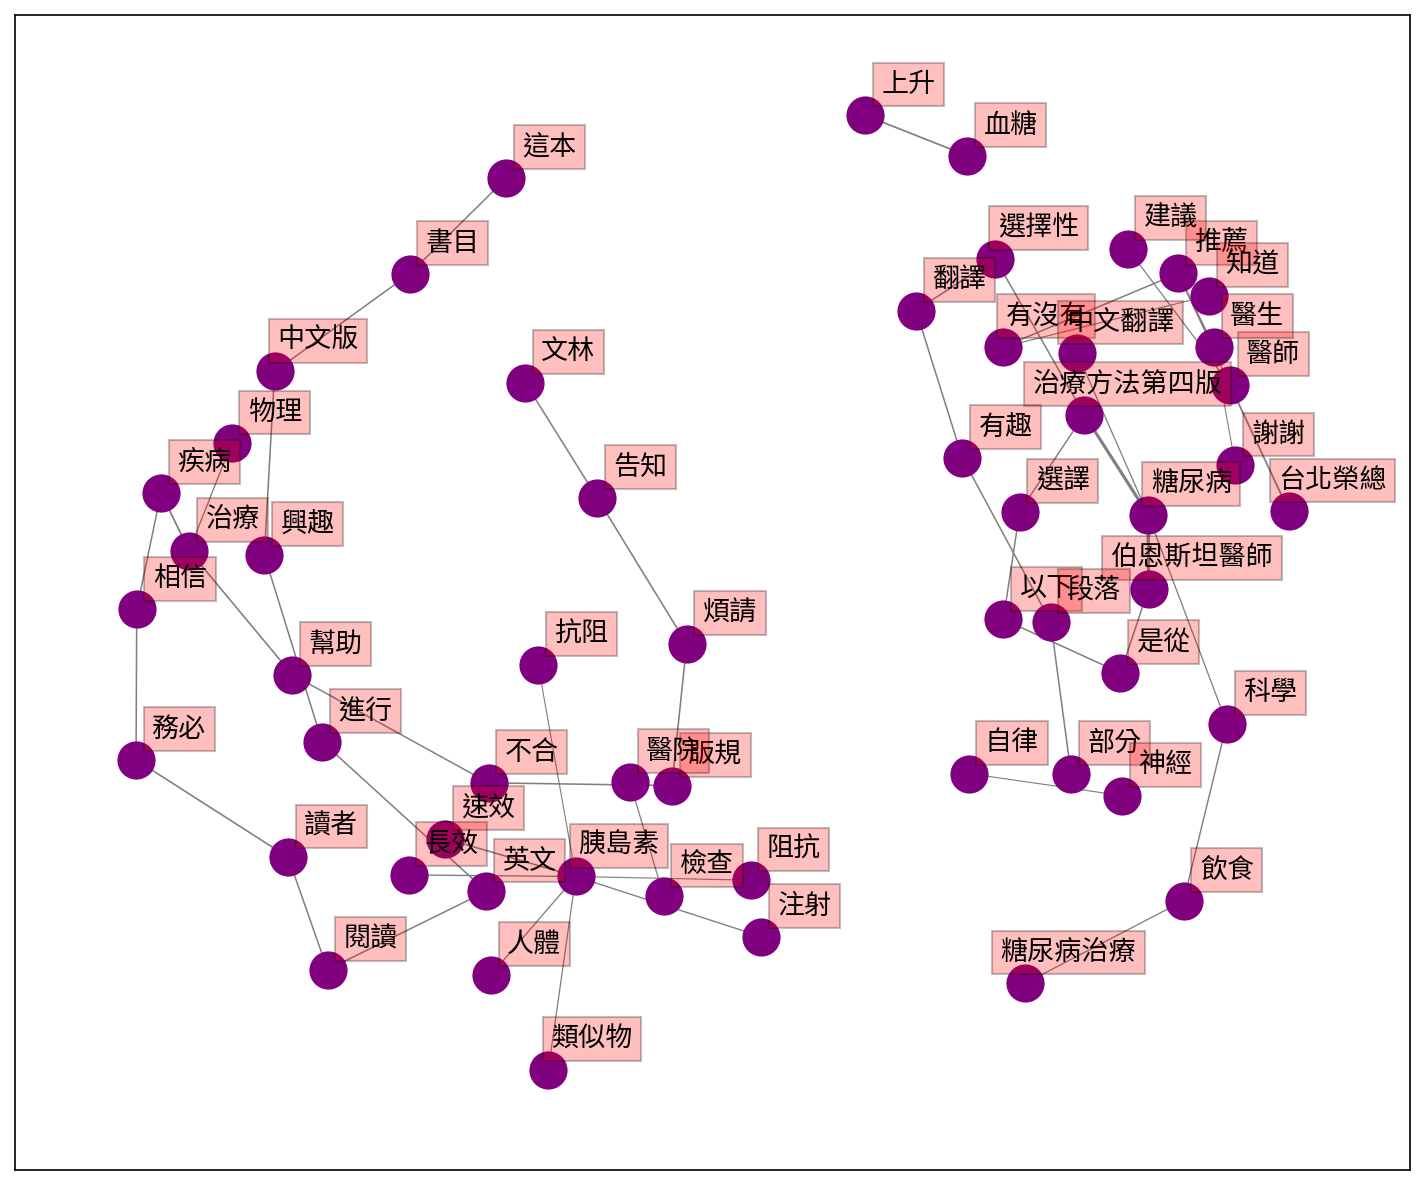

In [80]:
fig, ax = plt.subplots(figsize=(12, 10))

pos = nx.spring_layout(G, k=1.5)

# networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=weights,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# 增加 labels
for key, value in pos.items():
    x, y = value[0]+.07, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)

plt.show()

<span style="font-size: 14px;">以上為：共線圖</span><br>

##(四）LDA主題模型</span><br>

In [3]:
!pip install gensim
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 37.3 MB/s eta 0:00:00


In [6]:
import os

from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/SMA_final/smaproject') #切換該目錄
os.listdir() #確認目錄內容

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['SourceHanSansTW-Regular.otf',
 'dict.txt',
 'stopwords.txt',
 'dict.txt.big',
 'SMA_Final_Rawdata.csv',
 'LIWC_CH.csv',
 'negative.txt',
 'positive.txt',
 'stop_words.txt',
 'TaipeiSansTCBeta-Regular.ttf',
 '.DS_Store',
 'SMA期末專案.ipynb',
 'health_lexicon.txt']

In [37]:
import time
from functools import reduce
from collections import Counter
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.matutils import corpus2csc, corpus2dense, Sparse2Corpus

import pyLDAvis
import pyLDAvis.gensim_models

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

font_path = 'SourceHanSansTW-Regular.otf'
my_font = fm.FontProperties(fname=font_path)
font_name = my_font.get_name()

# 全域設定字體
# 把字型註冊進 matplotlib 系統
fm.fontManager.addfont(font_path)
# 設定中文字體
plt.rcParams['font.sans-serif'] = ['Source Han Sans TW'] #使圖中中文能正常顯示
plt.rcParams['axes.unicode_minus'] = False #使負號能夠顯示

udn = pd.read_csv("SMA_Final_Rawdata.csv")  # 匯資料

# 移除網址格式
# 只留下中文字
udn["artContent"] = udn["artContent"].str.replace("(http|https)://.*", "", regex=True)
udn["artTitle"] = udn["artTitle"].str.replace("(http|https)://.*", "", regex=True)
udn["artContent"] = udn["artContent"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)
udn["artTitle"] = udn["artTitle"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)
udn['artDate'] = pd.to_datetime(udn['artDate'])
udn['content'] = udn['artContent']


udn = udn.loc[:,["content", "artUrl", "artCatagory", 'artDate']]  # 文章內容 文章連結

# 設定繁體中文詞庫
jieba.set_dictionary("dict.txt.big")

# 載入 stopwords
with open("stop_words.txt", encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

# 定義斷詞函式，處理非字串或 NaN
def getToken(row):
    if not isinstance(row, str):
        row = ''
    seg_list = jieba.cut(row, cut_all=False)
    seg_list = [w for w in seg_list if w not in stopWords and len(w) > 1]
    return seg_list

# 套用斷詞
udn["words"] = udn["content"].apply(getToken)

Building prefix dict from /content/drive/MyDrive/SMA_final/smaproject/dict.txt.big ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/SMA_final/smaproject/dict.txt.big ...
Loading model from cache /tmp/jieba.u6ad6684f2f7f884767d377d933a79618.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.u6ad6684f2f7f884767d377d933a79618.cache
Loading model cost 2.531 seconds.
DEBUG:jieba:Loading model cost 2.531 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [8]:
docs = udn['words'].to_list()
docs[0]

['最近',
 '剛換',
 '工作',
 '一份',
 '工作',
 '冷氣',
 '沒什麼',
 '勞力',
 '已經',
 '長時間',
 '流汗',
 '下班',
 '懶得',
 '運動',
 '最近',
 '剛換',
 '烘焙',
 '工作',
 '環境',
 '不熱',
 '稍微',
 '出汗',
 '很久沒',
 '流汗',
 '回家',
 '洗完',
 '發現',
 '胸前',
 '大片',
 '小紅點',
 '摸起來',
 '顆粒感',
 '現在',
 '發文',
 '已經',
 '一段時間',
 '消了',
 '一點',
 '問問看',
 '症狀',
 '物料',
 '過敏',
 '可能性',
 '工作',
 '感覺',
 '不適',
 '需要',
 '醫生',
 '擦藥',
 '感謝']

In [9]:
dictionary = Dictionary(docs)

dictionary.filter_extremes(no_below=5, no_above=0.99)
print(dictionary)

Dictionary<5060 unique tokens: ['一份', '一段時間', '一點', '下班', '不適']...>


In [10]:
for idx, (k, v) in enumerate(dictionary.token2id.items()):
    print(f"{k}: {v}")
    if idx > 10:
        break

一份: 0
一段時間: 1
一點: 2
下班: 3
不適: 4
冷氣: 5
出汗: 6
可能性: 7
問問看: 8
回家: 9
大片: 10
工作: 11


In [11]:
pprint(" ".join(udn['words'].iloc[600]))

('媽媽 昏迷 搶救 一個月 無效 去世 這篇文 了問 醫療糾紛 一直 腦袋 揮之不去 問題 答案 媽媽 直接 死因 心因 性休克 先行 則是 病齡 數十年 '
 '風濕性 心臟病 動過 兩次 刀換 兩個 瓣膜 近半年 喊喘和悶 一個多月 車上 突然 昏迷 院前 有電 回來 獲得 進入 機會 整體 狀況 昏迷 前一天 '
 '回診 報告 出現 流鼻血 兩滴 症狀 告訴 醫生 回來 醫生 流鼻血 應該 心臟 無關 問題 有沒有 我媽 回診 導致 突然 昏迷 想到 一種 可能性 '
 '前一天 回診 醫生 發現 心臟 功能 不好 住院 觀察 討厭 住院 擔心 拒絕 醫生 隱瞞 這件 一個月 已經 一次 住院 觀察 主要 發現 第三個 '
 '瓣膜 問題 發現 想像中 嚴重 回家 闡述 一段 我媽 嚴正 警告 狀況 不好 應該 拒絕 問題 回診 醫生 機會 告訴 隨時 昏迷 這條 已經 坐實 '
 '僥倖 地想 有沒有 真的 運氣 很差 心律不整 比較嚴重 直接 昏迷 醫生 檢查 當時 狀況 很差 狀況 發生 機率 知道 事後 無濟於事 知道 錯得 '
 '希望 醫師 告訴 實話 想不開 已經 我媽 知道 病例 醫師 看到 這篇文 拜託 告訴 實話 感覺 我媽 急救 晚來 超音波 醫師 知道 昏迷 前得 '
 '情況 當時 有點 感覺 欲言又止 似乎 隱約 帶有 責備 腦補 還想問 去掛 主治醫生 得診 問題 回答 麻煩')


In [12]:
dictionary.doc2bow(udn['words'].iloc[600])[:10]

[(7, 1),
 (9, 1),
 (12, 3),
 (14, 2),
 (24, 1),
 (26, 3),
 (30, 6),
 (34, 1),
 (47, 4),
 (49, 2)]

In [13]:
# 建立 Bag-of-words 作為文章的特徵表示
# 用 gensim ldamodel input 需要將文章轉換成 bag of words
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [16]:
ldamodel = LdaModel(
    corpus=corpus,
    id2word=dictionary, # 字典
    num_topics=10, # 生成幾個主題數
    random_state=2025, # 亂數
)

In [17]:
ldamodel.print_topics()

[(0,
  '0.016*"醫生" + 0.009*"感覺" + 0.009*"問題" + 0.008*"請問" + 0.008*"覺得" + 0.008*"檢查" + 0.008*"謝謝" + 0.007*"症狀" + 0.007*"醫院" + 0.007*"發現"'),
 (1,
  '0.035*"醫師" + 0.019*"醫生" + 0.015*"醫院" + 0.013*"手術" + 0.009*"推薦" + 0.009*"請問" + 0.008*"診所" + 0.008*"謝謝" + 0.007*"檢查" + 0.007*"問題"'),
 (2,
  '0.031*"胰島素" + 0.026*"血糖" + 0.013*"糖尿病" + 0.013*"注射" + 0.013*"治療" + 0.012*"使用" + 0.009*"劑量" + 0.008*"方法" + 0.007*"藥物" + 0.007*"病人"'),
 (3,
  '0.023*"醫生" + 0.010*"請問" + 0.008*"問題" + 0.006*"開刀" + 0.006*"感覺" + 0.006*"真的" + 0.006*"謝謝" + 0.005*"目前" + 0.005*"醫院" + 0.004*"已經"'),
 (4,
  '0.013*"醫生" + 0.009*"治療" + 0.008*"醫師" + 0.008*"手術" + 0.008*"感覺" + 0.006*"問題" + 0.006*"檢查" + 0.006*"真的" + 0.006*"症狀" + 0.006*"已經"'),
 (5,
  '0.009*"醫生" + 0.009*"問題" + 0.007*"醫院" + 0.007*"治療" + 0.007*"眼睛" + 0.006*"分鐘" + 0.006*"醫師" + 0.005*"胰島素" + 0.005*"需要" + 0.005*"時間"'),
 (6,
  '0.019*"治療" + 0.013*"胰島素" + 0.012*"糖尿病" + 0.011*"血糖" + 0.011*"飲食" + 0.007*"方法" + 0.007*"醫師" + 0.006*"問題" + 0.006*"進行" + 0.005*"運動"'),
 (7,
  '0.019*"醫生" + 0

In [18]:
ldamodel.get_document_topics(corpus[0])

[(5, 0.31375998), (8, 0.66622144)]

In [19]:
# perplexity
perplexity = ldamodel.log_perplexity(corpus)
perplexity

-7.63293923837919

In [20]:
np.exp2(-perplexity)

198.49230079894025

In [21]:
# npmi
NPMI_model_lda = CoherenceModel(model=ldamodel, texts=docs, coherence='c_npmi')
NPMI_lda = NPMI_model_lda.get_coherence()
print('這個主題模型的 PMI score: ', NPMI_lda)

這個主題模型的 PMI score:  0.015926131526042383


In [22]:
NPMI_model_lda.get_coherence_per_topic()

[0.020847576403428526,
 0.04398897291280824,
 0.05806925784004859,
 0.024809714975861992,
 -0.0008575654949213812,
 -0.03749282913974679,
 0.03567613848332065,
 -0.017092187399825487,
 0.03616805733770811,
 -0.0048558206582585955]

In [30]:
t0 = time.time()

topic_num_list = np.arange(2, 10)
result = {"topic_num":[], "perplexity":[], "pmi":[]}
model_set = dict()


for topic_num in topic_num_list:
    # perplexity
    model = LdaModel(
        corpus = corpus,
        num_topics = topic_num ,
        id2word=dictionary,
        random_state = 1500,
        passes=5 # 訓練次數
        )

    loss = model.log_perplexity(corpus)
    pmi = CoherenceModel(model=model, texts=docs, coherence='c_npmi').get_coherence()
    perplexity = np.exp(-1. * loss)

    # model_set[f'k_{topic_num}'] = model

    result['topic_num'].append(topic_num)
    result['perplexity'].append(perplexity)
    result['pmi'].append(pmi)

print(f"花費時間: {time.time() - t0} sec")

花費時間: 131.15006828308105 sec


In [33]:
result = pd.DataFrame(result)
result

topic_num   perplexity       pmi
0          2  1565.372933  0.043973
1          3  1557.261773  0.036964
2          4  1558.745778  0.035573
3          5  1572.513305  0.031962
4          6  1577.632387  0.036916
5          7  1610.567100  0.033142
6          8  1606.415252  0.031498
7          9  1626.998992  0.025411

<Axes: xlabel='topic_num'>

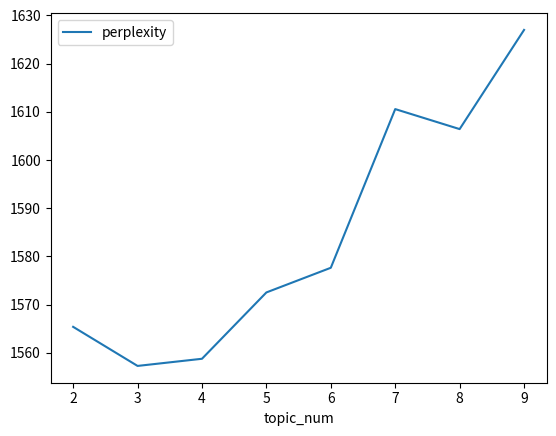

In [38]:
result.plot.line(x='topic_num', y='perplexity')

<span style="font-size: 14px;">發現在主題數2-4時效果最佳</span><br>

<Axes: xlabel='topic_num'>

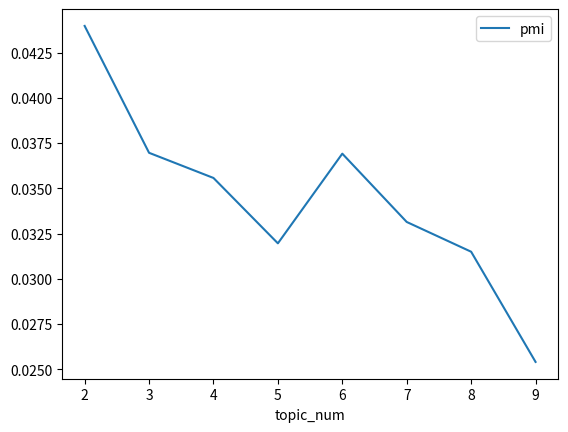

In [39]:
result.plot.line(x='topic_num', y='pmi')

<span style="font-size: 14px;">同樣在主題數2-4有較佳效果</span><br>

In [40]:
best_model = LdaModel(
    corpus = corpus,
    num_topics = 3,
    id2word=dictionary,
    random_state = 1500,
    passes = 5 # 訓練次數
    )

In [42]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(best_model, corpus, dictionary)
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.133286  0.066478       1        1  37.863382
0      0.227984  0.007950       2        1  33.655440
2     -0.094698 -0.074428       3        1  28.481178, topic_info=     Term         Freq        Total Category  logprob  loglift
4008  胰島素  1658.000000  1658.000000  Default  30.0000  30.0000
958    血糖  1497.000000  1497.000000  Default  29.0000  29.0000
30     醫生  2652.000000  2652.000000  Default  28.0000  28.0000
1288  糖尿病   921.000000   921.000000  Default  27.0000  27.0000
110    醫師  2263.000000  2263.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
260    改善   216.121071   506.729198   Topic3  -5.5687   0.4038
32     需要   244.995296   837.234657   Topic3  -5.4433   0.0271
14     感覺   260.994324  1046.148777   Topic3  -5.3800  -0.1324
52     一下   202.800298   549.629093   Topic3  -5.6323   0.2589
200    是否   203.198555   560.487793   Topic3  -5.6303   0.2413

[265 rows x 6 columns], token_table=      Topic      Freq Term
term                      
52        1  0.624057   一下
52        2  0.007278   一下
52        3  0.369340   一下
53        1  0.560944   一次
53        2  0.247996   一次
...     ...       ...  ...
3339      3  0.966595   高醫
289       1  0.192304   高雄
289       3  0.801266   高雄
854       3  0.967018   麻藥
1351      3  0.995387   鼻腔

[456 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

<span style="font-size: 14px;">依據上述較佳主題數生成模型</span><br>

## <span style="font-size: 16px;">(五）BERTopic</span><br>

In [5]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [6]:
import pandas as pd
import re
import numpy as np
import jieba
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
df = pd.read_csv("SMA_Final_Rawdata.csv", encoding='utf-8')
df["artDate"] = pd.to_datetime(df["artDate"])
df['artDate'] = df['artDate'].dt.date

clear_df = df.copy()
#去除本次不會用到的欄位
drop_cols = ['system_id', 'artPoster', 'artCatagory', 'artComment', 'e_ip', 'insertedDate', 'dataSource']
clear_df.drop(drop_cols, axis = 1, inplace = True)
#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)
#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','', regex=True)
#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].str.replace(r'http\S+', '', regex=True).str.replace(r'www\S+', '', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode('sentence').reset_index(drop=True)
# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]
sent_df['sentence'] = sent_df['sentence'].apply(lambda x: re.sub('[^\u4e00-\u9fff]+', '',x))

# sampled_df = sent_df.sample(n=100, random_state=222)

In [7]:
# 中文文章
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from hdbscan import HDBSCAN


docs_zh = sent_df['sentence'].tolist()[:3000]

# 設定繁體中文詞庫
jieba.set_dictionary('dict.txt.big')

# 新增 stopwords
with open('stop_words.txt',encoding="utf-8") as f:
    stopwords = [line.strip() for line in f.readlines()]

# 設定中文 embedding model
bert_sentence_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")


# 將中文文章轉換為 embedding
embeddings = bert_sentence_model.encode(docs_zh, show_progress_bar=True)

# 定義不同 clustering layer 所要使用的模型與方法（就用 default 的 DBSCAN）
hdbscan_model = HDBSCAN(
    min_cluster_size=30,    # 如果一個群集裡的文件少於 50 篇，就會被視為噪音，不列為獨立主題。
    min_samples=10,         # 一個點若要被算作核心點，就必須在它周圍有至少 10 個鄰居點。數值愈大，群集會更穩固，但也可能忽略掉邊緣一點的文件。
    metric="euclidean"      # 歐氏距離
)
# 定義一個適合中文的分詞函數
def tokenize_zh(text):
    words = jieba.lcut(text)
    return words

# 建立一個使用 jieba 分詞的 CountVectorizer
jieba_vectorizer = CountVectorizer(
    tokenizer=tokenize_zh,
    stop_words=stopwords,
    min_df=5, # 只保留至少出現在 5 篇文件中的詞，減少雜訊
    max_df=0.8, # 排除出現在超過 80% 文件的詞
    analyzer='word',
    token_pattern=u"(?u)\\b\\w+\\b")

# 使用 BERTopic 進行主題模型建立
zh_topic_model = BERTopic(
    embedding_model=bert_sentence_model,
    vectorizer_model=jieba_vectorizer,
    verbose=True,
    top_n_words=30,
    nr_topics="auto" #最終要幾個主題
    )
topics, probs = zh_topic_model.fit_transform(docs_zh, embeddings)

zh_topic_model.get_topic_info()

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/94 [00:00<?, ?it/s]

2025-06-17 01:38:17,989 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-17 01:38:55,236 - BERTopic - Dimensionality - Completed ✓
2025-06-17 01:38:55,241 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-17 01:38:55,503 - BERTopic - Cluster - Completed ✓
2025-06-17 01:38:55,505 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
Building prefix dict from /content/drive/MyDrive/SMA_final/smaproject/dict.txt.big ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/SMA_final/smaproject/dict.txt.big ...
Dumping model to file cache /tmp/jieba.u6ad6684f2f7f884767d377d933a79618.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.u6ad6684f2f7f884767d377d933a79618.cache
Loading model cost 2.736 seconds.
DEBUG:jieba:Loading model cost 2.736 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.
2025-06-17 01:38:58,692 - BERTopic - Representati

Topic  Count              Name  \
0      -1    858     -1_醫生_醫師_說_比較   
1       0    211     0_手術_醫生_醫師_治療   
2       1    157      1_痛_走路_會痛_疼痛   
3       2    144        2_謝謝_好_版_完   
4       3    142    3_沒什麼_不知_知道_效果   
5       4    118       4_量_兩次_時間_月   
6       5    109     5_爸爸_呼吸_症狀_不到   
7       6     92      6_想_一下_請教_幫忙   
8       7     88     7_注意_以上_左右_位置   
9       8     81      8_藥物_服用_吃_一顆   
10      9     78     9_吃_東西_超音波_檢測   
11     10     71     10_晚上_小時_早上_躺   
12     11     62    11_擔心_焦慮_嚴重_真的   
13     12     49      12_症狀_炎_檢測_性   
14     13     48            13____   
15     14     48     14_媽媽_家人_今年_歲   
16     15     39   15_推薦_長庚_這方面_醫院   
17     16     33      16_開_手術_感覺_說   
18     17     30     17_傷口_紗布_換_狀態   
19     18     29    18_手指_家人_感覺_發現   
20     19     29    19_小孩_目前_檢查_看診   
21     20     27    20_檢驗_健檢_檢查_確診   
22     21     25      21_升高_高_肉_運動   
23     22     25     22_查_造成_晚上_彎曲   
24     23     25     23_項目_自費_買_裡面   
25     24     25      24_約_去年_吃_正常   
26     25     23    25_正常_照片_三個_現象   
27     26     21  26_神經_頭暈_神經內科_長期   
28     27     20      27_心跳_下_恢復_量   
29     28     20    28_風濕_新冠_導致_仔細   
30     29     20    29_疫情_嚴重_最近_期間   
31     30     20     30_好轉_稍微_好_狀況   
32     31     19     31_回家_一天_後_紗布   
33     32     19    32_超音波_需要_做_照片   
34     33     17    33_心臟_心跳_運動_明顯   
35     34     17    34_復原_復發_恢復_很常   
36     35     17     35_長_變得_有點_發炎   
37     36     17    36_抽血_血液_報告_檢查   
38     37     17    37_中間_位置_部分_屁股   
39     38     16     38_長期_原本_小孩_小   
40     39     16     39_完全_一直_幫_仔細   
41     40     15     40_查_網路_上網_一下   
42     41     15    41_身心_家人_版上_擔心   
43     42     13    42_回家_回診_上班_後續   
44     43     12     43_仔細_微_微創_一次   
45     44     12    44_胸腔_斷層_朋友_爸爸   
46     45     11    45_清楚_出現_麻麻_實在   

                                       Representation  \
0   [醫生, 醫師, 說, 比較, 做, 開刀, 復健, 自費, 醫院, 建議, 感覺, 科, ...   
1   [手術, 醫生, 醫師, 治療, 急診, 已, 做, 是否, 病人, 復健, 醫院, 推薦,...   
2   [痛, 走路, 會痛, 疼痛, 受傷, 動作, 肌肉, 痛到, 傷口, 痠痛, 整個, 手術...   
3   [謝謝, 好, 版, 完, 版友, 健康, 先, 版上, 文章, 以上, 沒事, 身體, 分...   
4   [沒什麼, 不知, 知道, 效果, 似乎, 無法, 癢, 太, 改善, 特別, 影響, 位置...   
5   [量, 兩次, 時間, 月, 休息, 回診, 躺, 最後, 半年, 幾天, 已經, 久, 一...   
6   [爸爸, 呼吸, 症狀, 不到, 確診, 一直, 鏡, 嚴重, 突然, 明顯, 問題, 左,...   
7   [想, 一下, 請教, 幫忙, 經驗, 版友, 類似, 建議, 請問, 朋友, 分享, 請,...   
8   [注意, 以上, 左右, 位置, 約, 好像, 覺得, 維持, 進入, 片子, 住, 事情,...   
9   [藥物, 服用, 吃, 一顆, 復發, 改善, 多久, 高, 半年, 月, 造成, 好轉, ...   
10  [吃, 東西, 超音波, 檢測, 健康, 術後, 時間, 好像, 太, 正常, 鏡, 檢查,...   
11  [晚上, 小時, 早上, 躺, 點, 呼吸, 無法, 困擾, 現在, 時間, 整個, 每天,...   
12  [擔心, 焦慮, 嚴重, 真的, 影響, 越來越, 壓力, 遇到, 痛到, 胸悶, 頭暈, ...   
13  [症狀, 炎, 檢測, 性, 看到, 上網, 嚴重, 天, 遇到, 胸悶, 似乎, 完全, ...   
14  [, , , , , , , , , , , , , , , , , , , , , , ,...   
15  [媽媽, 家人, 今年, 歲, 長輩, 住, 小孩, 真的, 已經, 買, 家裡, 進入, ...   
16  [推薦, 長庚, 這方面, 醫院, 醫師, 有沒有, 中, 以下, 資訊, 網路, 醫生, ...   
17  [開, 手術, 感覺, 說, 刀, 醫生, 給我, 知道, 最近, 神經, 人, 檢查, 一...   
18  [傷口, 紗布, 換, 狀態, 持續, 下午, 碰到, 提供, 屁股, 稍微, 血液, 撞,...   
19  [手指, 家人, 感覺, 發現, 情形, 尤其, 程度, 不太, 撞, 左, 正常, 一個月...   
20  [小孩, 目前, 檢查, 看診, 今天, 診所, 家裡, 應該, 附近, 症, 放心, 問題...   
21  [檢驗, 健檢, 檢查, 確診, 看診, 檢測, 昨天, 做, 日, 測試, 介紹, 仔細,...   
22  [升高, 高, 肉, 運動, 地方, 有時, 時, 造成, 麻麻, 實在, 發燒, 進入, ...   
23  [查, 造成, 晚上, 彎曲, 碰到, 變, 屁股, 手指, 上網, 像是, 陰性, 歲, ...   
24  [項目, 自費, 買, 裡面, 變成, 了解, 通常, 直接, 問題, 之後, 幫, 發現,...   
25  [約, 去年, 吃, 正常, 現在, 習慣, 曾經, 骨折, 微, 升高, 沒想到, 三個,...   
26  [正常, 照片, 三個, 現象, 原本, 請問, 最後, 確定, 這是, 走路, 量, 人,...   
27  [神經, 頭暈, 神經內科, 長期, 請教, 相關, 姿勢, 痛苦, 算是, 覺得, 文章,...   
28  [心跳, 下, 恢復, 量, 人, 後, 仔細, 在家, 測試, 姿勢, 家裡, 一定, 自...   
29  [風濕, 新冠, 導致, 仔細, 幾年, 怪怪的, 建議, 裡面, 的藥, 篩, 口罩, 資...   
30  [疫情, 嚴重, 最近, 期間, 得到, 機率, 容易, 口罩, 效果, 小孩, 現在, 回...   
31  [好轉, 稍微, 好, 狀況, 很快, 篩, 後續, 沒事, 有時, 一點, 做, 確診, ...   
32  [回家, 一天, 後, 紗布, 習慣, 維持, 兩天, 屁股, 後續, 以下, 部位, 手指...   
33  [超音波, 需要, 做, 照片, 曾經, 治療, 有點, 還要, 像是, 天, 左右, 昨天...   
34  [心臟, 心跳, 運動, 明顯, 感覺, 好像, 很快, 感, 開, 以下, 低, 壓力, ...   
35  [復原, 復發, 恢復, 很常, 後續, 機會, 天, 狀態, 每次, 急診, 似乎, 先,...   
36  [長, 變得, 有點, 發炎, 很常, 氏症, 藥膏, 吃藥, 部位, 瘀, 青, 炎, 最...   
37  [抽血, 血液, 

In [8]:
eleven_topic =BERTopic(
    embedding_model=bert_sentence_model,
    vectorizer_model=jieba_vectorizer,
    verbose=True,
    top_n_words=30,
    nr_topics=7 #最終要幾個主題
    )
ele_topics, ele_probs = eleven_topic.fit_transform(docs_zh, embeddings)

2025-06-17 01:38:59,644 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-17 01:39:19,303 - BERTopic - Dimensionality - Completed ✓
2025-06-17 01:39:19,305 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-17 01:39:19,448 - BERTopic - Cluster - Completed ✓
2025-06-17 01:39:19,450 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-06-17 01:39:19,836 - BERTopic - Representation - Completed ✓
2025-06-17 01:39:19,837 - BERTopic - Topic reduction - Reducing number of topics
2025-06-17 01:39:19,856 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-17 01:39:20,232 - BERTopic - Representation - Completed ✓
2025-06-17 01:39:20,235 - BERTopic - Topic reduction - Reduced number of topics from 72 to 7


In [9]:
eleven_topic.visualize_topics()

<span style="font-size: 14px;">最終發現6個主題數為最佳</span><br>

In [ ]:
# 把 topic 0 和 topic 1 轉成 DataFrame
topic0_df = pd.DataFrame(eleven_topic.get_topic(0), columns=["Topic 0", "Weight"])
topic1_df = pd.DataFrame(eleven_topic.get_topic(1), columns=["Topic 1", "Weight"])

# 合併兩個 DataFrame，根據 index 對齊
combined_df = pd.concat([topic0_df, topic1_df], axis=1)

display(combined_df)

Topic 0    Weight Topic 1    Weight
0       醫師  0.100233       好  0.214421
1       感覺  0.079500      正常  0.182429
2       覺得  0.066574      一下  0.173226
3        開  0.063466       完  0.083615
4       有點  0.063310      朋友  0.077187
5       一直  0.063147      以上  0.069217
6        中  0.062468       先  0.066310
7       已經  0.061988      狀況  0.066272
8       檢查  0.061298      詢問  0.058370
9       目前  0.060928      現在  0.057742
10      知道  0.057629      一次  0.055267
11      家人  0.054599      每次  0.050604
12      應該  0.053416       查  0.049405
13      狀況  0.051868       跑  0.043778
14       好  0.049952      看看  0.042313
15       幫  0.048837       幫  0.039222
16      需要  0.047538      檢查  0.037869
17       已  0.046237       人  0.036716
18       完  0.044620      今天  0.035835
19       前  0.040456      回家  0.033736
20       時  0.040407      覺得  0.033417
21      好像  0.039070      確定  0.031513
22      時間  0.038916      真的  0.030681
23      持續  0.038636      目前  0.029360
24      比較  0.036322      一直  0.028175
25      今天  0.035696       約  0.026917
26      真的  0.035656      知道  0.026702
27      正常  0.035334       已  0.026524
28      現在  0.033552      好像  0.026148
29      術後  0.033026       中  0.023890

<span style="font-size: 20px;">四、結論</span><br>
<span style="font-size: 14px;">1.因資料集內容包含疾病和症狀等用詞，故普遍負面情緒比例較多。</span><br>
<span style="font-size: 14px;">2.其中「糖尿病」相關議題比例較高，可見台灣人對於常見慢性病較為在意。</span><br>
<span style="font-size: 14px;">3.主題模型中，使用LDA主題模型較能得到我們想得到的資訊。</span>